### Differentially Expressed Genes in Subcluster #2

In [131]:
import scanpy as sc  # For single-cell RNA-seq data analysis.
import scipy.stats as stats # For scientific computing.
import numpy as np  # For numerical computing.
import infercnvpy as cnv  # For inferCNV analysis.
import matplotlib.pyplot as plt # For plotting.
import seaborn as sns # For plotting.
import scipy.sparse as sparse # For sparse matrix.
import pandas as pd # For data manipulation.
import scvi # For single-cell RNA-seq data analysis.
import gseapy as gp # For Gene Set Enrichment Analysis (GSEA).
from gseapy import barplot, dotplot # For GSEA plotting.
import scipy as sp


In [2]:
# Defining the base path to the directory containing single-cell RNA-seq data.
# Make sure to update this path according to your file system.
base_data_path = "/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data"

In [3]:
# Load the saved AnnData object from the .h5ad file
adata = sc.read_h5ad(f'{base_data_path}/cnv_complete_analyses_PLAUR_subset_cells.h5ad')
adata


AnnData object with n_obs × n_vars = 73580 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'score_sig', 'cell_type', 'cnv_leiden', 'cnv_score', 'PLAUR_Status_Binary'
    var: 'n_cells', 'chromosome', 'start', 'end'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cnv', 'cnv_leiden', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'connectivities', 'distances'

In [4]:
# Step 1: Load the pre-trained scVI model
# This line loads a previously trained scVI model from a specified path.
# `model.model` is the saved model file, and `base_data_path` should contain the directory path where it is located.
# By passing `adata`, we ensure the loaded model is aligned with this specific dataset for further analysis.

model = scvi.model.SCVI.load(f'{base_data_path}/model.model', adata)


INFO     File /Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data/model.model/model.pt already downloaded          


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = tor

In [6]:
# Perform differential expression analysis between Treated and Untreated G1.Macrophage_DC1 cells
# using the scVI model.

# Step 1: Define the indices for the two cell groups
# - idx1: Treated G1.Macrophage_DC1 cells
# - idx2: Untreated G1.Macrophage_DC1 cells

scvi_de_2 = model.differential_expression(
    idx1=(adata.obs['cell_type'].isin(['G1.Macrophage_DC1']) & (adata.obs['Sample'] == 'Treated')),
    idx2=(adata.obs['cell_type'].isin(['G1.Macrophage_DC1']) & (adata.obs['Sample'] == 'Untreated'))
)

# Step 2: Optionally subset the data to a specific cluster, such as Cluster #3, if needed.
# For example, if you want to focus on a different subset, adjust the cell type as shown below.

# Uncomment the following line to create a subset for another cell type or cluster.
# cluster_3_cells = adata[adata.obs['cell_type'] == '3'].copy()

# Verify the results of the differential expression analysis by viewing the output.
print("Differential expression results for Treated vs Untreated G1.Macrophage_DC1 cells:")
scvi_de_2.head(10)


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

Differential expression results for Treated vs Untreated G1.Macrophage_DC1 cells:


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
IGLV7-43,0.9904,0.0096,4.636345,0.000654,0.000192,0.0,0.25,8.036838,8.676225,9.825594,-24.783747,31.543613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
IGLV1-47,0.9888,0.0112,4.480577,0.000551,0.001498,0.0,0.25,7.753374,9.554667,11.087465,-34.759941,36.120430,0.000168,0.000000,0.000168,0.000000,0.000526,0.000000,True
IGLV7-46,0.9864,0.0136,4.283991,0.000078,0.000289,0.0,0.25,5.060547,6.801540,7.945575,-26.034199,26.106750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
IGLV4-69,0.9856,0.0144,4.226022,0.000080,0.000116,0.0,0.25,4.202262,5.289816,6.001369,-16.788227,19.219170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
IGHV3-15,0.9852,0.0148,4.198217,0.000118,0.000199,0.0,0.25,5.621175,6.935505,8.454315,-24.959652,26.455059,0.000000,0.002551,0.000000,0.002551,0.000000,0.001232,True
IGKV3-15,0.9852,0.0148,4.198217,0.001725,0.000304,0.0,0.25,6.427523,6.564116,8.951273,-28.661961,39.634155,0.000000,0.002551,0.000000,0.002551,0.000000,0.002453,True
IGLV2-14,0.9848,0.0152,4.171142,0.000043,0.000143,0.0,0.25,3.929528,5.178883,6.838855,-21.722189,22.399843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
IGLV2-8,0.9846,0.0154,4.157867,0.000016,0.000035,0.0,0.25,4.247169,4.858706,7.167747,-21.784565,24.389669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
IGLV1-40,0.9838,0.0162,4.106411,0.000139,0.000346,0.0,0.25,4.144141,5.341220,6.965174,-21.790112,22.536350,0.003368,0.000000,0.000168,0.000000,0.007075,0.000000,True


In [7]:
# Save the unfiltered differential expression results to an Excel file
# The path is constructed using `base_data_path` and the filename, ensuring no additional quotes around the filename.

scvi_de_2.to_excel(f'{base_data_path}/Unfiltered_Cluster_1_DEG_results.xlsx')


In [8]:
# Step 1: Filter for Differentially Expressed Genes (DEGs)
# Keep only rows where genes are differentially expressed (FDR < 0.05) 
# and the absolute log fold change (lfc_mean) is greater than 0.5
scvi_de_2 = scvi_de_2[(scvi_de_2['is_de_fdr_0.05']) & (abs(scvi_de_2['lfc_mean']) > 0.5)]

# Step 2: Sort the DEGs by Log Fold Change
# Sort genes by log fold change (lfc_mean) in ascending order for easy interpretation
scvi_de_2 = scvi_de_2.sort_values('lfc_mean')

# Step 3: Display the filtered and sorted DEGs
scvi_de_2


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
FGB,0.9796,0.0204,3.871609,1.034406e-05,0.000122,0.0,0.25,-4.541704,-5.032182,3.157216,-14.655971,8.753502,0.010271,0.497449,0.004546,0.099490,0.065743,0.944691,True
TRPM1,0.9806,0.0194,3.922891,6.783197e-07,0.000005,0.0,0.25,-4.141446,-4.375688,2.754726,-13.187069,7.857617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
CLLU1OS,0.9830,0.0170,4.057395,1.883869e-07,0.000001,0.0,0.25,-3.945398,-4.477028,2.939103,-12.501421,11.276730,0.000000,0.002551,0.000000,0.002551,0.000000,0.006381,True
APCS,0.9712,0.0288,3.518157,8.324659e-05,0.000675,0.0,0.25,-3.876904,-4.431302,3.196928,-13.057628,9.183519,0.210305,6.410721,0.044620,0.456633,0.802569,7.947022,True
BBOX1,0.9764,0.0236,3.722625,2.807277e-06,0.000025,0.0,0.25,-3.690948,-4.326071,2.834801,-10.703166,9.591789,0.003368,0.122449,0.002862,0.071429,0.007195,0.196798,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IGHV3-15,0.9852,0.0148,4.198217,1.182442e-04,0.000199,0.0,0.25,5.621175,6.935505,8.454315,-24.959652,26.455059,0.000000,0.002551,0.000000,0.002551,0.000000,0.001232,True
IGLV9-49,0.9826,0.0174,4.033731,2.221504e-06,0.000005,0.0,0.25,6.155466,6.706362,9.006221,-25.102869,31.430883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
IGKV3-15,0.9852,0.0148,4.198217,1.725009e-03,0.000304,0.0,0.25,6.427523,6.564116,8.951273,-28.661961,39.634155,0.000000,0.002551,0.000000,0.002551,0.000000,0.002453,True


In [9]:
# Export the filtered DEGs to an Excel file
scvi_de_2.to_excel(f'{base_data_path}/filtered_Cluster_1_DEG_results.xlsx')


In [11]:
# Select the top 25 upregulated and top 25 downregulated genes based on sorted `lfc_mean`
genes_to_show = scvi_de_2[-25:].index.tolist() + scvi_de_2[:25].index.tolist()
print(genes_to_show)

['IGHV3-23', 'DPT', 'IGHV1-69', 'IGHM', 'IGKV2D-29', 'IGKV4-1', 'IGKV3-20', 'IGLV1-51', 'IGKV1-16', 'IGHV3-11', 'IGKV1-27', 'IGLV2-14', 'IGLV3-10', 'IGLV1-40', 'IGLV4-69', 'IGLV3-19', 'IGLV2-8', 'IGKV1-6', 'IGHV1-18', 'IGLV7-46', 'IGHV3-15', 'IGLV9-49', 'IGKV3-15', 'IGLV1-47', 'IGLV7-43', 'FGB', 'TRPM1', 'CLLU1OS', 'APCS', 'BBOX1', 'BAAT', 'CEACAM7', 'AC013457.1', 'RFPL4A', 'KCNJ16', 'MUC15', 'AC104461.1', 'FGG', 'CRP', 'LINC02712', 'AC013275.1', 'AL138826.1', 'C4BPA', 'GABRB3', 'CLDN8', 'DCSTAMP', 'TMEM213', 'AC093821.1', 'AC004870.2', 'CD5L']


KeyError: nan

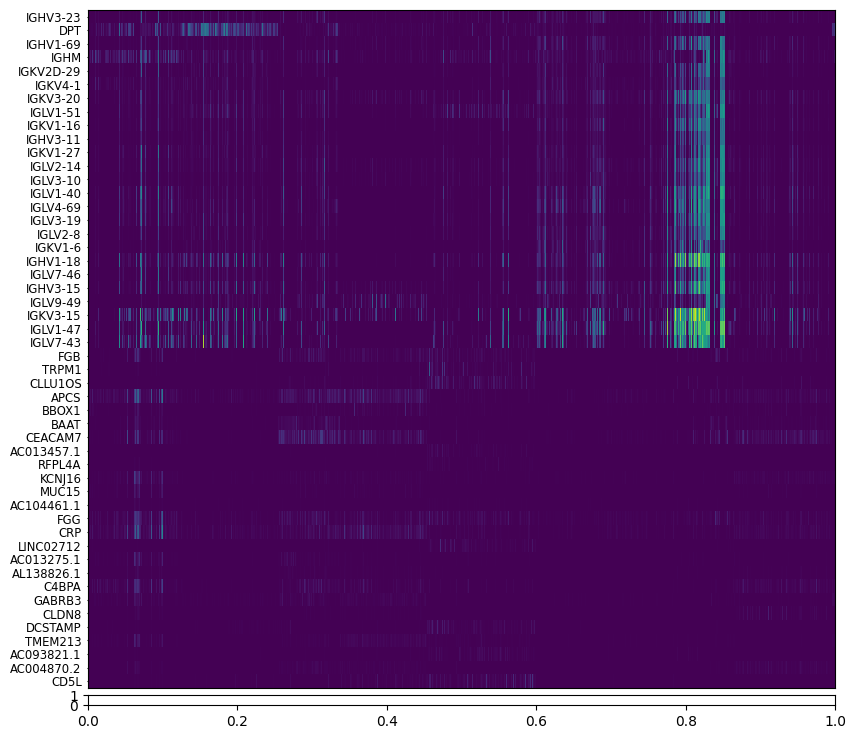

In [12]:
# Plot a heatmap of the top 25 upregulated and 25 downregulated genes for each cell type
sc.pl.heatmap(
    adata,                           # AnnData object containing the data
    genes_to_show,                   # List of genes to display, including top and bottom 25 genes
    groupby='cell_type',             # Group cells by their cell type
    swap_axes=True,                  # Swap axes to display cell types on the x-axis and genes on the y-axis
    show_gene_labels=True,           # Display gene names on the heatmap
    layer='scvi_normalized',         # Use the 'scvi_normalized' layer of the data for visualization
    log=True                         # Apply a logarithmic transformation for better contrast
)


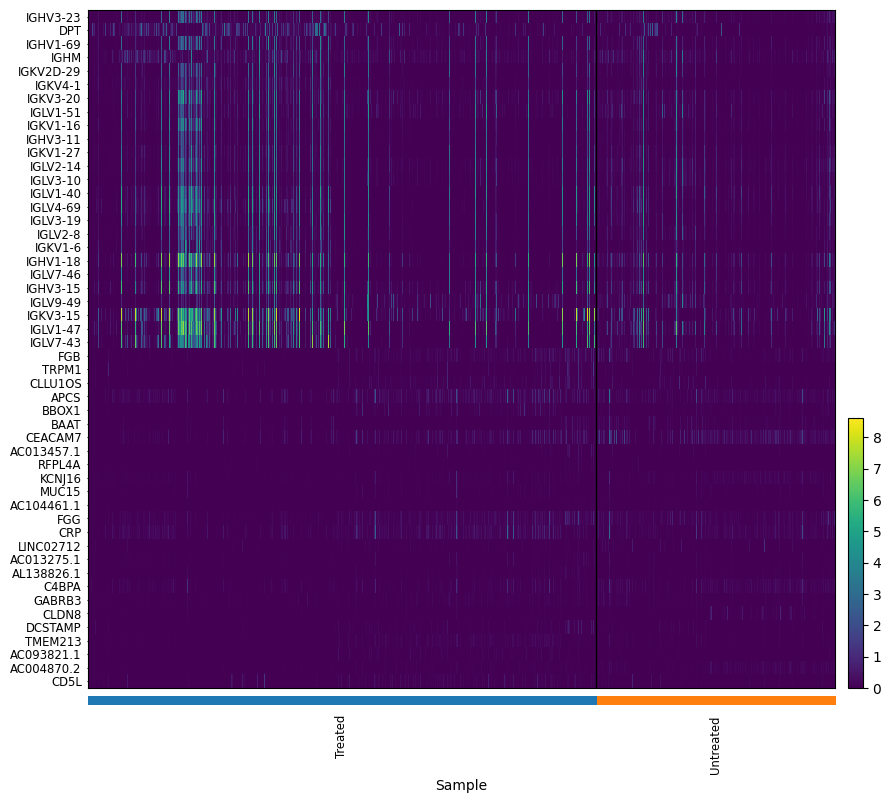

In [13]:
# Plot a heatmap of the top 25 upregulated and 25 downregulated genes across different samples
sc.pl.heatmap(
    adata,                           # AnnData object containing the data
    genes_to_show,                   # List of top and bottom 25 genes for display
    groupby='Sample',                # Group cells by their sample type (e.g., Treated vs Untreated)
    swap_axes=True,                  # Swap axes to display samples on the x-axis and genes on the y-axis
    show_gene_labels=True,           # Display gene names on the heatmap for easy identification
    layer='scvi_normalized',         # Use the 'scvi_normalized' layer of the data for visualization
    log=True                         # Apply a logarithmic transformation for better contrast
)


In [14]:
# Save the AnnData object with DEGs results to a file in .h5ad format
adata.write_h5ad(f'{base_data_path}/adata_cluster_1-DEGs.h5ad')


### GO Biological Process Analysis with GSEAPY: Enrichment Insights

In [16]:
# Load the pre-saved AnnData object for cluster 1 DEGs from an .h5ad file
adata = sc.read_h5ad(f'{base_data_path}/adata_cluster_1-DEGs.h5ad')
adata

AnnData object with n_obs × n_vars = 73580 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'score_sig', 'cell_type', 'cnv_leiden', 'cnv_score', 'PLAUR_Status_Binary', '_scvi_raw_norm_scaling'
    var: 'n_cells', 'chromosome', 'start', 'end'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cnv', 'cnv_leiden', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'connectivities', 'distances'

In [19]:
# Retrieve and display available gene set libraries
libraries = gp.get_library_name()
print("Available Gene Set Libraries for Analysis:")
print(libraries)

Available Gene Set Libraries for Analysis:
['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger

In [22]:
# Perform Gene Ontology (GO) Biological Process Enrichment Analysis
enr_go = gp.enrichr(
    gene_list=scvi_de_2[scvi_de_2.lfc_mean > 0].index.tolist(),  # Use only upregulated genes (positive log-fold change)
    gene_sets=['GO_Biological_Process_2021'],                    # Specify the GO Biological Process library
    organism='human',                                            # Define the organism as 'human'
    outdir=None,                                                 # Prevent writing results to disk; keeps results in memory
    background=adata.var_names.tolist()                          # Use all genes in `adata` as the background
)
enr_go.results.head(5)


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,extracellular matrix organization (GO:0030198),6.932739e-11,1.170246e-07,0,0,6.075976,142.130327,COL13A1;COL14A1;LAMC3;MMP1;CMA1;SERPINE1;DPT;C...
1,GO_Biological_Process_2021,extracellular structure organization (GO:0043062),2.876594e-10,1.756113e-07,0,0,7.051075,154.906793,COL13A1;COL14A1;LAMC3;MMP1;SERPINE1;COL19A1;HA...
2,GO_Biological_Process_2021,external encapsulating structure organization ...,3.121054e-10,1.756113e-07,0,0,7.013891,153.517808,COL13A1;COL14A1;LAMC3;MMP1;SERPINE1;COL19A1;HA...
3,GO_Biological_Process_2021,hydrogen peroxide catabolic process (GO:0042744),2.139326e-07,8.242093e-05,0,0,31.656743,486.171759,HBZ;HBG2;HBG1;HBB;HBA1;HBD
4,GO_Biological_Process_2021,skeletal system development (GO:0001501),2.441378e-07,8.242093e-05,0,0,6.797370,103.493587,COL13A1;MYOC;HHIP;CHRD;PRELP;PTH1R;HAPLN1;COL1...


In [23]:
# Perform WikiPathways Enrichment Analysis
enr_go_wiki = gp.enrichr(
    gene_list=scvi_de_2[scvi_de_2.lfc_mean > 0].index.tolist(),  # Select upregulated genes
    gene_sets=['WikiPathway_2023_Human'],                        # Specify WikiPathways 2023 for Human
    organism='human',                                            # Define the organism as 'human'
    outdir=None,                                                 # Keep results in memory, do not save to disk
    background=adata.var_names.tolist()                          # Use all genes in `adata` as background
)
# Display top results for WikiPathway enrichment
enr_go_wiki.results.head()



,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,WikiPathway_2023_Human,PI3K Akt Signaling Pathway WP4172,8.264963e-07,0.000204,0,0,4.318043,60.478818,CHRM2;NGFR;PDGFRA;TNXB;LAMC3;FLT4;NGF;THBS2;IL...
1,WikiPathway_2023_Human,Focal Adhesion PI3K Akt mTOR Signaling Pathway...,1.465088e-06,0.000204,0,0,4.353480,58.482886,CHRM2;NGFR;PDGFRA;TNXB;LAMC3;FLT4;NGF;THBS2;IL...
2,WikiPathway_2023_Human,miRNA Targets In ECM And Membrane Receptors WP...,1.380128e-05,0.001284,0,0,20.118104,225.136658,COL3A1;TNXB;COL1A2;COL6A3;THBS2
3,WikiPathway_2023_Human,Sudden Infant Death Syndrome SIDS Susceptibili...,6.635085e-05,0.004628,0,0,4.998669,48.089962,CHRM2;NEUROD1;ADCYAP1R1;KCNJ8;SST;FEV;HTR2A;NG...
4,WikiPathway_2023_Human,miR 509 3P Alteration Of YAP1 ECM Axis WP3967,9.120614e-05,0.005089,0,0,20.995428,195.307629,EDNRA;COL3A1;THBS2;GPC6


In [25]:
# Perform KEGG Pathway Enrichment Analysis
enr_go_kegg = gp.enrichr(
    gene_list=scvi_de_2[scvi_de_2.lfc_mean > 0].index.tolist(),  # Use the list of upregulated genes
    gene_sets=['KEGG_2021_Human'],                               # Specify KEGG 2021 for Human pathways
    organism='human',                                            # Define organism as 'human'
    outdir=None,                                                 # Keep results in memory, do not save to disk
    background=adata.var_names.tolist()                          # Use all genes in `adata` as background
)
# Display top results for KEGG enrichment
enr_go_kegg.results.head()



,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Neuroactive ligand-receptor interaction,7.777648e-10,1.532197e-07,0,0,5.870174,123.124536,CHRM2;GRIA2;ADCYAP1R1;SCT;PTGER2;PMCH;GCG;CCK;...
1,KEGG_2021_Human,PI3K-Akt signaling pathway,1.554879e-06,1.531556e-04,0,0,4.118278,55.078313,CHRM2;NGFR;PDGFRA;TNXB;LAMC3;FLT4;NGF;THBS2;IL...
2,KEGG_2021_Human,Protein digestion and absorption,1.482948e-05,9.738024e-04,0,0,6.892670,76.638866,CELA3B;COL3A1;COL1A2;COL13A1;COL14A1;COL4A6;CO...
3,KEGG_2021_Human,Maturity onset diabetes of the young,2.686015e-05,1.322862e-03,0,0,17.098446,179.958865,NEUROD1;IAPP;GCK;INS;NKX2-2
4,KEGG_2021_Human,ECM-receptor interaction,4.429792e-05,1.745338e-03,0,0,6.877285,68.941841,TNXB;COL1A2;LAMC3;TNN;COL4A6;ITGA8;COL6A3;THBS2


In [27]:
# Perform Reactome Pathway Enrichment Analysis
enr_go_reactome = gp.enrichr(
    gene_list=scvi_de_2[scvi_de_2.lfc_mean > 0].index.tolist(),  # List of upregulated genes
    gene_sets=['Reactome_2022'],                                 # Specify Reactome 2022 pathways
    organism='human',                                            # Define organism as 'human'
    outdir=None,                                                 # Keep results in memory, do not save to disk
    background=adata.var_names.tolist()                          # Use all genes in `adata` as background
)
# Display top results for Reactome enrichment
enr_go_reactome.results.head()


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Extracellular Matrix Organization R-HSA-1474244,1.897778e-14,9.431955e-12,0,0,7.492331,236.724003,TNXB;COL13A1;COL14A1;LAMC3;SERPINE1;FBLN1;FBLN...
1,Reactome_2022,GPCR Ligand Binding R-HSA-500792,1.055462e-10,2.622822e-08,0,0,5.200399,119.462905,CHRM2;ADCYAP1R1;CCL11;SCT;PTGER2;PLPPR5;PMCH;P...
2,Reactome_2022,Class A/1 (Rhodopsin-like Receptors) R-HSA-373076,3.562547e-09,5.901953e-07,0,0,5.643127,109.774559,CHRM2;CHGA;CCL11;CCL21;PTGER2;PLPPR5;PMCH;GPR4...
3,Reactome_2022,Collagen Chain Trimerization R-HSA-8948216,2.133829e-07,2.651283e-05,0,0,15.308384,235.139496,COL3A1;COL1A2;COL13A1;COL14A1;COL4A6;COL10A1;C...
4,Reactome_2022,Signaling By GPCR R-HSA-372790,3.001327e-07,2.983319e-05,0,0,3.334042,50.074114,CHRM2;ADCYAP1R1;CCL11;SCT;PTGER2;PLPPR5;PMCH;P...


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


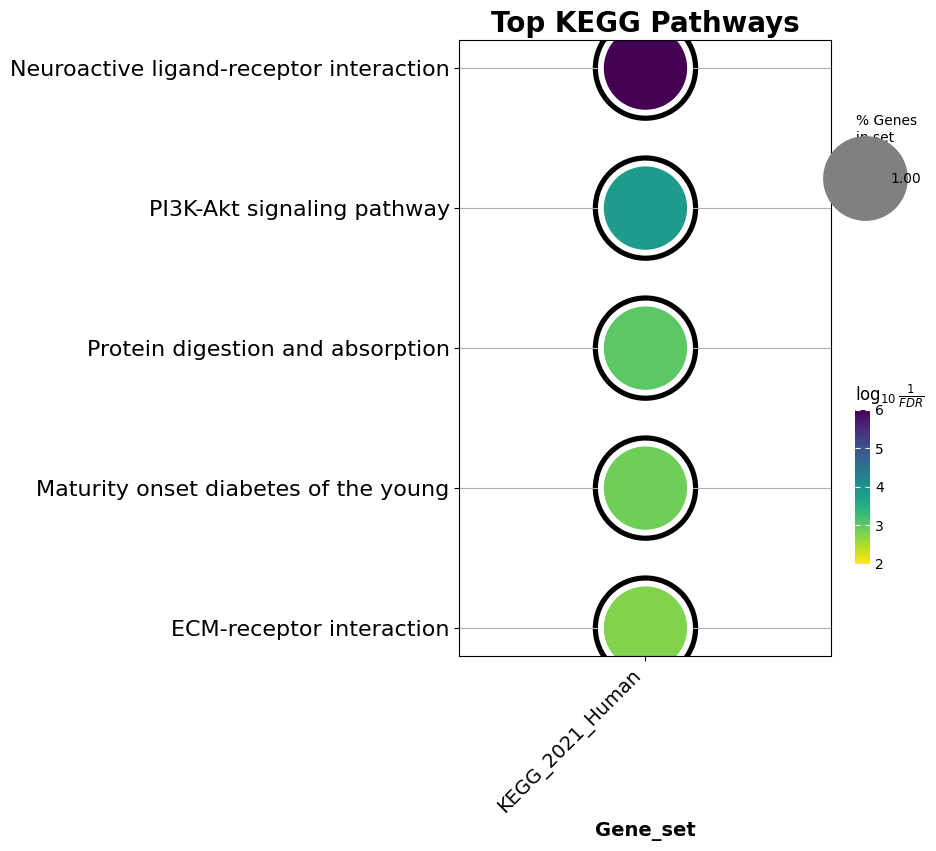

In [28]:
# Plot top 5 KEGG enrichment terms
ax = dotplot(
    enr_go_kegg.results,                  # Enrichment results data
    column="Adjusted P-value",            # Column to represent on dot size (e.g., p-value)
    x='Gene_set',                         # X-axis to display gene sets
    size=10,                              # Set dot size
    top_term=5,                           # Number of top terms to display
    figsize=(6, 8),                       # Figure size
    title="Top KEGG Pathways",            # Title of the plot
    xticklabels_rot=45,                   # Rotate x-axis labels for readability
    show_ring=True,                       # Set to False to remove the outer ring around dots
    marker='o'                            # Dot shape
)

/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


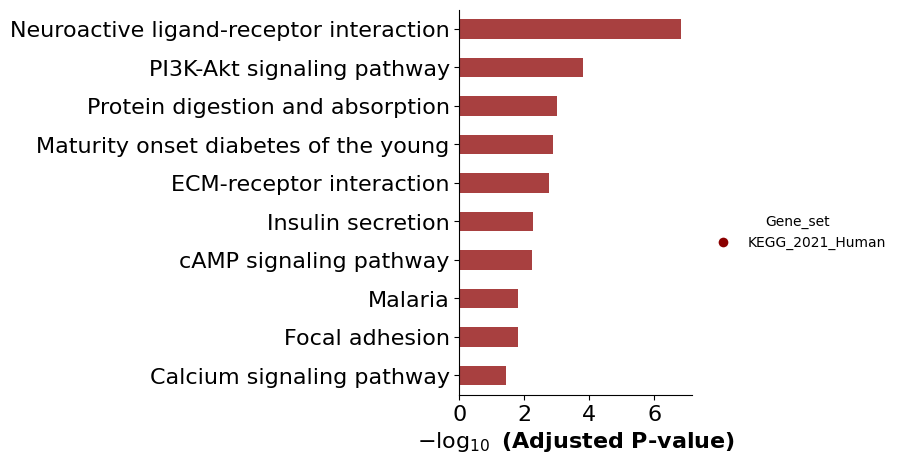

In [29]:
# Create a bar plot for KEGG enrichment results
ax = barplot(
    enr_go_kegg.results,                        # Enrichment results DataFrame
    column="Adjusted P-value",                  # Column to display p-values (lower is better)
    group='Gene_set',                           # Group by gene sets for comparison
    size=10,                                    # Size of bars
    top_term=10,                                # Display the top 10 enrichment terms
    figsize=(3, 5),                             # Size of the figure
    # color can be specified either with a list or a dictionary for specific colors
    color={'KEGG_2021_Human': 'darkred', 'MSigDB_Hallmark_2020': 'darkblue'}
)

/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


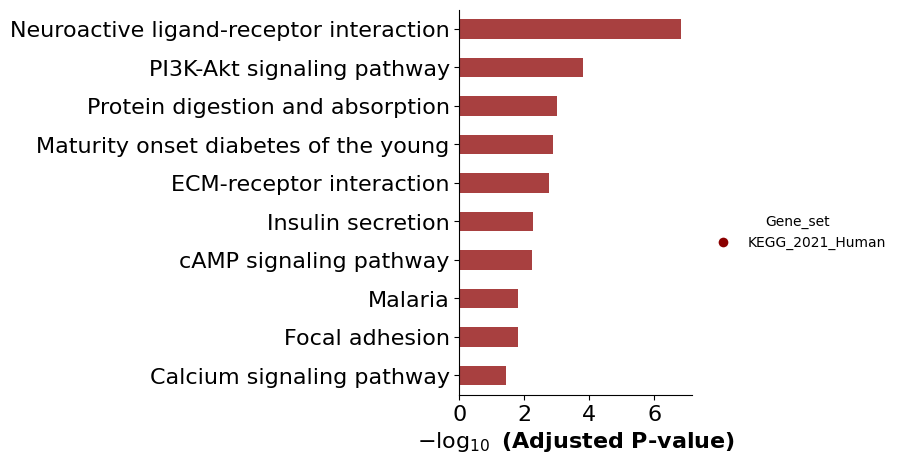

In [30]:
# Step 1: Create a bar plot to visualize KEGG enrichment results
ax = barplot(
    enr_go_kegg.results,                 # DataFrame containing KEGG enrichment results
    column="Adjusted P-value",           # Use "Adjusted P-value" to represent bar height, lower values indicate higher significance
    group='Gene_set',                    # Group the bars by gene set for multi-sample comparisons
    size=10,                             # Controls the size of the bars
    top_term=10,                         # Only show the top 10 most significant terms
    figsize=(3, 5),                      # Set the size of the plot (width, height)

    # Color options for the bars:
    # You can provide a dictionary to specify colors for each gene set.
    # Here, "KEGG_2021_Human" bars are dark red and "MSigDB_Hallmark_2020" bars are dark blue
    color={'KEGG_2021_Human': 'darkred', 'MSigDB_Hallmark_2020': 'darkblue'}
)


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


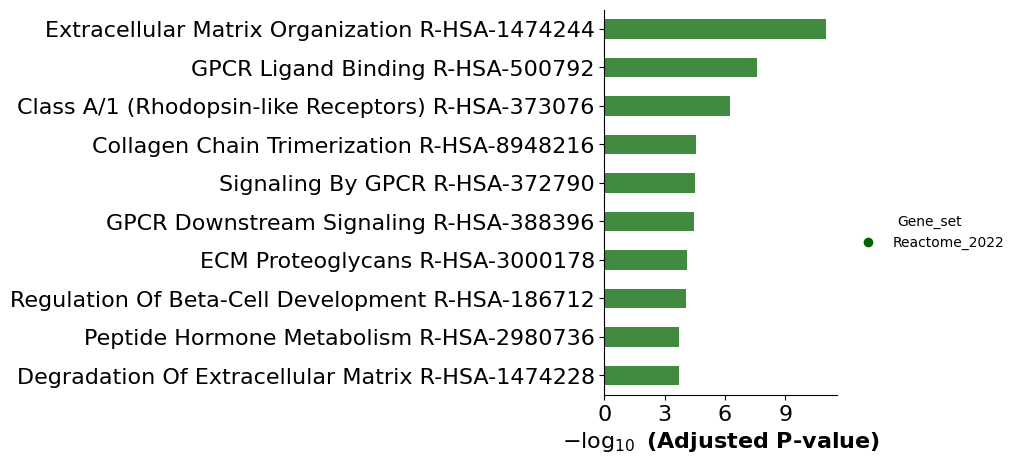

In [31]:
# Step 1: Create a bar plot to visualize Reactome enrichment results
ax = barplot(
    enr_go_reactome.results,             # DataFrame containing Reactome enrichment results
    column="Adjusted P-value",           # Use "Adjusted P-value" as y-axis to represent significance
    group='Gene_set',                    # Group the bars by gene set for comparative analysis
    size=10,                             # Adjust size of each bar for clarity
    top_term=10,                         # Show only the top 10 most significant terms
    figsize=(3, 5),                      # Set the figure size (width, height)

    # Optional: Define custom colors for specific groups
    # Note: Ensure that specified colors correspond to the groups in your data
    color={'Reactome_2022': 'darkgreen', 'MSigDB_Hallmark_2020': 'darkblue'}
)

# Optional customization: Add titles, axis labels, or further adjust visual properties here if desired

In [34]:
# Perform Enrichment Analysis for Upregulated Genes in Kinase Perturbation Experiments
enr_go_Kinase_up = gp.enrichr(
    gene_list=scvi_de_2[scvi_de_2.lfc_mean > 0].index.tolist(),  # List of genes with positive log fold-change
    gene_sets=['Kinase_Perturbations_from_GEO_up'],              # Specify Kinase Perturbations dataset for enrichment
    organism='human',                                            # Specify the organism (e.g., 'human')
    outdir=None,                                                 # Set to None to avoid writing output to disk
    background=adata.var_names.tolist()                          # Provide the full background gene list for reference
)
enr_go_Kinase_up.results.head()


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,Kinase_Perturbations_from_GEO_up,PTK7 knockdown 185 GSE50138,0.000342,0.081686,0,0,3.720021,29.690747,ADAMTS4;FSTL5;TCEAL5;IGKC;PTPRN;AHSP;MYH11;HSP...
1,Kinase_Perturbations_from_GEO_up,RAF1 activemutant 219 GSE42964,0.001673,0.199982,0,0,3.030211,19.371659,ADAMTS4;CLDN5;MYOC;COL4A6;MYH11;TAGLN3;PCDH12;...
2,Kinase_Perturbations_from_GEO_up,SYK knockdown 280 GDS3609,0.003465,0.276059,0,0,2.912051,16.496743,SULT1C2;PDGFRA;ADCYAP1R1;NFASC;COL13A1;SOX18;K...
3,Kinase_Perturbations_from_GEO_up,MET knockout 250 GDS3148,0.006933,0.414248,0,0,2.620464,13.027532,CHGA;ALAS2;CLEC3B;NFASC;FAM162B;NXPH3;LAMC3;AB...
4,Kinase_Perturbations_from_GEO_up,ABL1 druginhibition 77 GSE24493,0.017488,0.682338,0,0,2.533991,10.253177,CHGA;GREM2;GAP43;TNN;STMN2;PI16;CD1C;NGF


In [35]:
# Perform Enrichment Analysis using MSigDB Hallmark gene sets
enr_go_MSigDB_hallmark = gp.enrichr(
    gene_list=scvi_de_2[scvi_de_2.lfc_mean > 0].index.tolist(),  # List of upregulated genes from DE analysis
    gene_sets=['MSigDB_Hallmark_2020'],                         # Specify MSigDB Hallmark 2020 gene sets
    organism='human',                                           # Set organism to 'human'
    outdir=None,                                                # Do not save output files
    background=adata.var_names.tolist()                         # Background gene list for comparison
)

# Display the top results
enr_go_MSigDB_hallmark.results.head()


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Pancreas Beta Cells,2.145318e-13,8.366740e-12,0,0,30.950454,902.834611,PCSK2;NEUROD1;CHGA;G6PC2;ABCC8;SST;GCG;IAPP;IN...
1,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,6.974121e-09,1.359954e-07,0,0,6.516890,122.394103,TAGLN;MMP1;SERPINE1;FBLN1;THY1;THBS2;FBLN2;DCN...
2,MSigDB_Hallmark_2020,Myogenesis,5.083390e-06,6.608407e-05,0,0,5.070240,61.803849,CFD;TAGLN;AEBP1;MYL4;COL3A1;SGCD;DES;STC2;APLN...
3,MSigDB_Hallmark_2020,heme Metabolism,5.707846e-04,5.565150e-03,0,0,3.763034,28.104212,MYL4;HBZ;ALAS2;CA1;EPB42;GYPB;TAL1;HBB;AHSP;HBD
4,MSigDB_Hallmark_2020,Coagulation,4.565675e-02,2.868659e-01,0,0,2.660703,8.212535,CFD;MMP1;SERPINE1;TIMP3;F2RL2


In [36]:
# Save the final AnnData object containing GO analysis results and metadata for cluster 1
adata.write_h5ad(f'{base_data_path}/adata_cluster_1_final_GO_analysis.h5ad')


In [88]:
adata.obs['cell_type']

AAACCCACAACATACC-1          G0.T cells/NK
AAACCCACATCTATCT-1          G0.T cells/NK
AAACCCACATGATGCT-1    G2.Epithelial_pro_1
AAACCCAGTATCGTAC-1          G0.T cells/NK
AAACCCAGTCACCCTT-1          G0.T cells/NK
                             ...         
TTTGGTTGTTCCACGG-1         G7.Endothelial
TTTGTTGGTACCCGCA-1          G3.Fibroblast
TTTGTTGGTCGCATGC-1         G7.Endothelial
TTTGTTGGTTCTCACC-1          G3.Fibroblast
TTTGTTGTCATCGCCT-1         G7.Endothelial
Name: cell_type, Length: 73580, dtype: category
Categories (12, object): ['G0.T cells/NK', 'G1.Macrophage_DC1', 'G2.Epithelial_pro_1', 'G3.Fibroblast', ..., 'G8.Epithelial_5', 'G9.B_cells_1', 'G10.Epithelial_normal', 'G11.B_cells_2']

### Subclustering and Gene Expression Dot Plot Analysis of Cluster 1 Macrophages

AAACCCACAACATACC-1    False
AAACCCACATCTATCT-1    False
AAACCCACATGATGCT-1    False
AAACCCAGTATCGTAC-1    False
AAACCCAGTCACCCTT-1    False
                      ...  
TTTGGTTGTTCCACGG-1    False
TTTGTTGGTACCCGCA-1    False
TTTGTTGGTCGCATGC-1    False
TTTGTTGGTTCTCACC-1    False
TTTGTTGTCATCGCCT-1    False
Name: cell_type, Length: 73580, dtype: bool


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scanpy/tools/_leiden.py:197: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


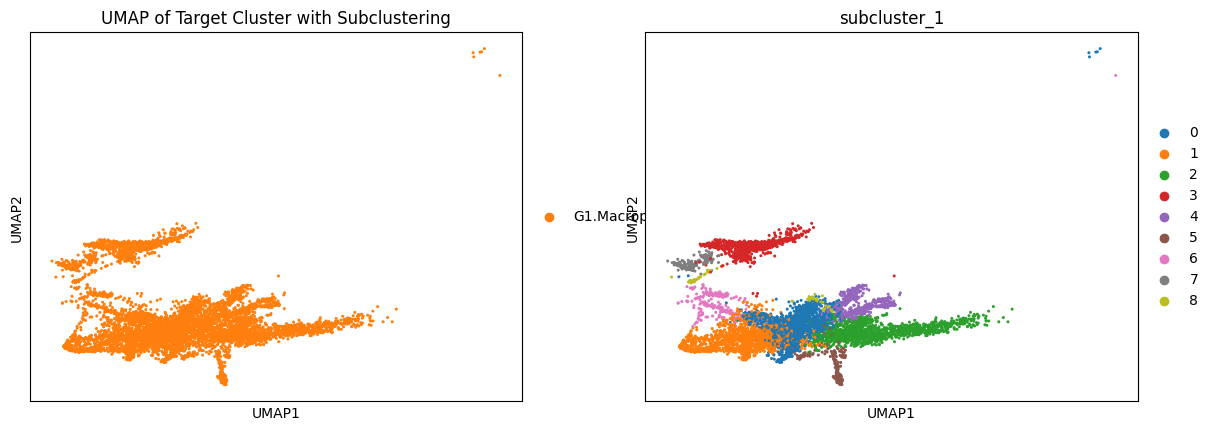

In [91]:
# Step 1: Define the target cluster to subcluster (e.g., Macrophages in Cluster 1)
target_cluster = "G1.Macrophage_DC1"

# Step 2: Create a mask to filter out cells belonging to the target cluster
cluster_mask = adata.obs["cell_type"] == target_cluster
print(cluster_mask)

# Step 3: Apply the mask to create a subset AnnData object containing only cells from the target cluster
sub_adata = adata[cluster_mask, :]

# Step 4: Perform subclustering using the Leiden algorithm
# The resolution parameter controls the granularity of the subclusters; adjust based on desired detail
sc.tl.leiden(sub_adata, resolution=0.25, key_added="subcluster_1")

# Step 5: Visualize the UMAP with subcluster information
# Color by both the main cell type and the new subclusters for easy comparison
sc.pl.umap(sub_adata, color=["cell_type", "subcluster_1"], title="UMAP of Target Cluster with Subclustering")


In [92]:
sub_adata

AnnData object with n_obs × n_vars = 6331 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'score_sig', 'cell_type', 'cnv_leiden', 'cnv_score', 'PLAUR_Status_Binary', '_scvi_raw_norm_scaling', 'subcluster_1'
    var: 'n_cells', 'chromosome', 'start', 'end'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cnv', 'cnv_leiden', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'rank_genes_groups', 'umap', 'subcluster_1', 'subcluster_1_colors'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neig

### Classification of M1 vs. M2 Macrophage Clusters in Single-Cell Data

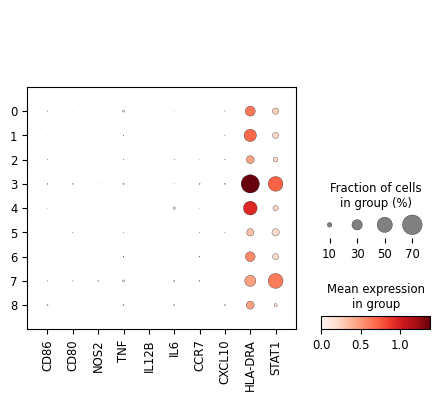

In [93]:
# Define M1 macrophage marker genes
m1_markers = ['CD86', 'CD80', 'NOS2', 'TNF', 'IL12B', 'IL6', 'CCR7', 'CXCL10', 'HLA-DRA', 'STAT1']

# Generate a dot plot for M1 markers across subclusters in the target macrophage subset
sc.pl.dotplot(
    sub_adata,
    m1_markers,               # M1 marker genes to display
    groupby='subcluster_1'     # Group by subclusters identified in previous steps
)


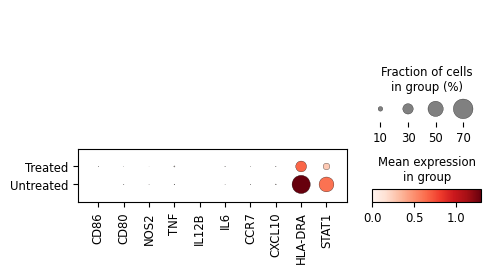

In [94]:
# Define a list of M1 macrophage marker genes
m1_markers = ['CD86', 'CD80', 'NOS2', 'TNF', 'IL12B', 'IL6', 'CCR7', 'CXCL10', 'HLA-DRA', 'STAT1']

# Generate a dot plot to examine M1 marker expression by sample
sc.pl.dotplot(
    sub_adata,
    m1_markers,              # List of M1 markers to display in the plot
    groupby='Sample'         # Group by the 'Sample' column to compare across different samples
)


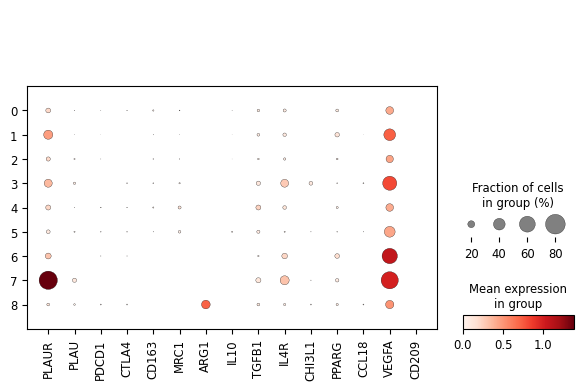

In [95]:
# Define a list of M2 macrophage markers, including unconventional markers (PLAUR and VEGFA)
m2_markers = ['PLAUR', 'PLAU', 'PDCD1', 'CTLA4', 'CD163', 'MRC1', 'ARG1', 'IL10', 'TGFB1', 'IL4R', 'CHI3L1', 'PPARG', 'CCL18', 'VEGFA', 'CD209']

# Generate a dot plot to examine the expression of M2 markers by subcluster
sc.pl.dotplot(
    sub_adata,
    m2_markers,             # List of M2 markers to display in the plot
    groupby='subcluster_1'  # Group by 'subcluster_1' to compare expression across subclusters
)


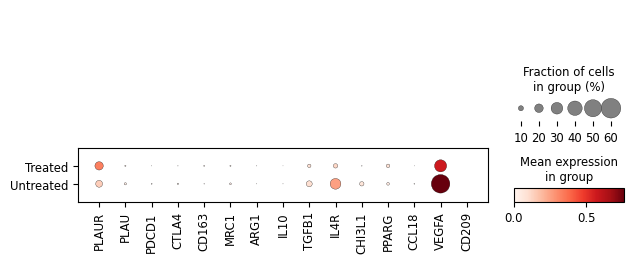

In [96]:
# Define M2 macrophage markers with additional markers like PLAUR and VEGFA to capture unconventional phenotypes
m2_markers = ['PLAUR', 'PLAU', 'PDCD1', 'CTLA4', 'CD163', 'MRC1', 'ARG1', 'IL10', 'TGFB1', 'IL4R', 'CHI3L1', 'PPARG', 'CCL18', 'VEGFA', 'CD209']

# Generate a dot plot to visualize the expression of M2 markers across samples
sc.pl.dotplot(
    sub_adata,
    m2_markers,             # List of M2 markers
    groupby='Sample'        # Group by 'Sample' to compare expression patterns between samples
)


In [97]:
# Define a dictionary to map numeric cluster labels to more descriptive group names
# This mapping is useful for assigning a simpler label to each cluster

cell_type_2 = {
    "0": "G0",  # Cluster 0 mapped to Group G0
    "1": "G1",  # Cluster 1 mapped to Group G1
    "2": "G2",  # Cluster 2 mapped to Group G2
    "3": "G3",  # Cluster 3 mapped to Group G3
    "4": "G4",  # Cluster 4 mapped to Group G4
    "5": "G5",  # Cluster 5 mapped to Group G5
    "6": "G6"   # Cluster 6 mapped to Group G6
}

# Explanation:
# - The keys ("0", "1", etc.) represent numeric labels from clustering analysis.
# - The values ("G0", "G1", etc.) represent assigned group names for easier identification.
# - This mapping can be used to rename clusters in visualizations or analyses for readability.


In [98]:
# Map the numeric 'leiden' cluster labels in sub_adata to more descriptive group names using the cell_type_2 dictionary
sub_adata.obs['cell_type_2'] = sub_adata.obs.leiden.map(cell_type_2)

# Explanation:
# - 'sub_adata.obs.leiden' contains the numeric labels from the Leiden clustering.
# - The 'map' function applies the 'cell_type_2' dictionary to replace the numeric labels with their corresponding descriptive names.
# - The new column 'cell_type_2' in the observations (obs) DataFrame will contain the mapped group names, making it easier to interpret the data.


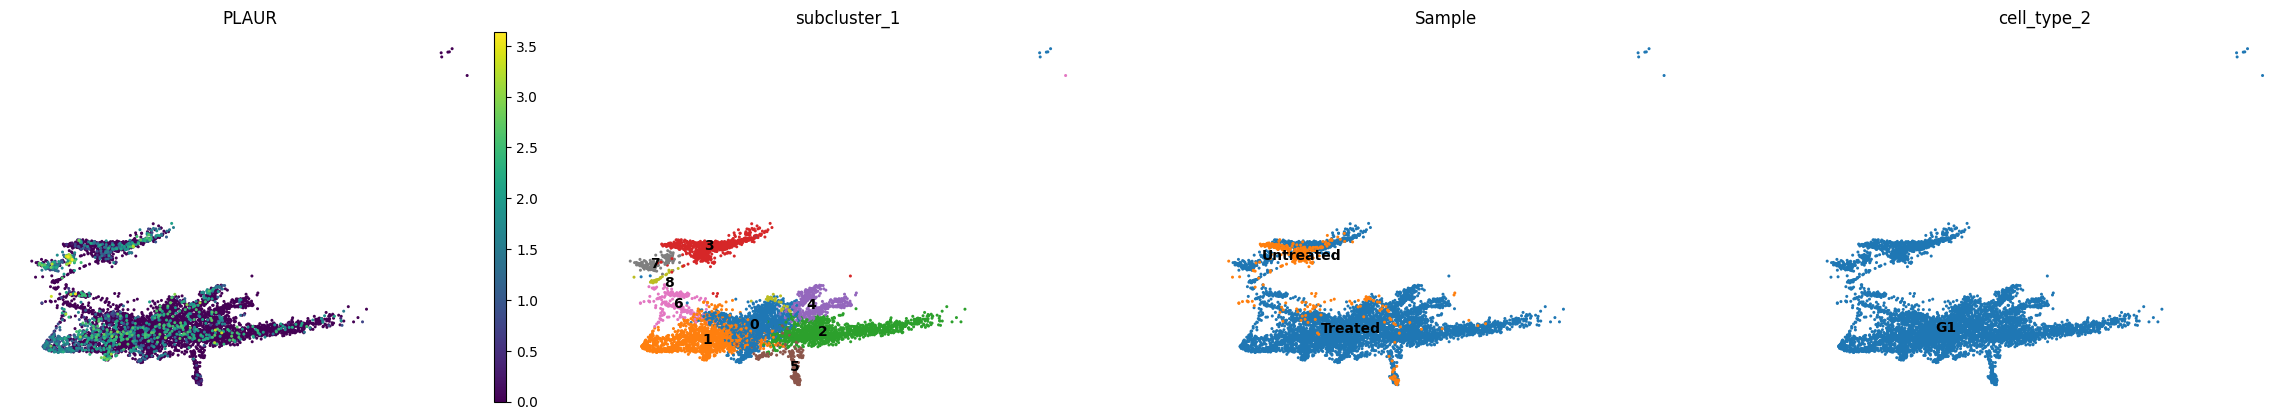

In [99]:
# Plot UMAP representation of the sub_adata dataset
# Coloring the points by the specified features to visualize their distribution in UMAP space
sc.pl.umap(
    sub_adata,                             # The AnnData object containing the data
    color=["PLAUR", 'subcluster_1', "Sample", "cell_type_2"],  # Features to color the UMAP points
    frameon=False,                         # Disable the frame around the plot
    legend_loc="on data"                  # Position the legend on the data points in the plot
)

# Note:
# - "PLAUR" represents the expression levels of the PLAUR gene.
# - 'subcluster_1' indicates the subclustering results.
# - "Sample" distinguishes different samples in the dataset.
# - "cell_type_2" provides additional context on the cell types for each point in the UMAP.


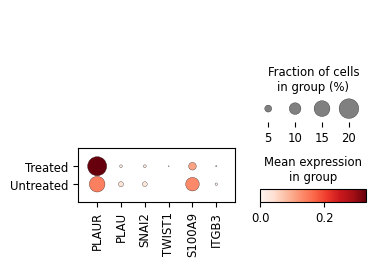

In [100]:
# Generate a dot plot to visualize the expression levels of selected genes across different samples
sc.pl.dotplot(
    sub_adata,                                 # The AnnData object containing the data
    ['PLAUR', 'PLAU', 'SNAI2', 'TWIST1', 'S100A9', 'ITGB3'],  # List of genes to display
    groupby='Sample'                           # Group the data by 'Sample' for comparison
)

# Note:
# - This dot plot shows the expression levels of the specified genes for each sample in the dataset.
# - Each dot represents the mean expression of a gene in a sample, with the size indicating the number of cells expressing that gene.


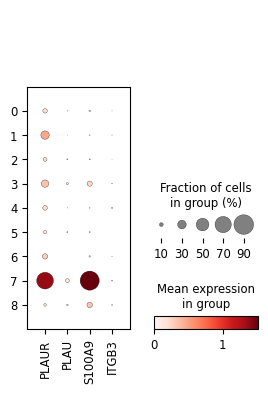

In [101]:
# Generate a dot plot to visualize the expression levels of selected genes across different subclusters
sc.pl.dotplot(
    sub_adata,                              # The AnnData object containing the subset of data
    ['PLAUR', 'PLAU', 'S100A9', 'ITGB3'], # List of genes to display on the dot plot
    groupby='subcluster_1'                 # Group the data by 'subcluster_1' to compare expression levels across subclusters
)

# Note:
# - This dot plot illustrates the expression of the specified genes (PLAUR, PLAU, S100A9, ITGB3) for each subcluster in the dataset.
# - Each dot's color represents the mean expression level of the gene, while the size of the dot indicates the number of cells expressing that gene within each subcluster.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

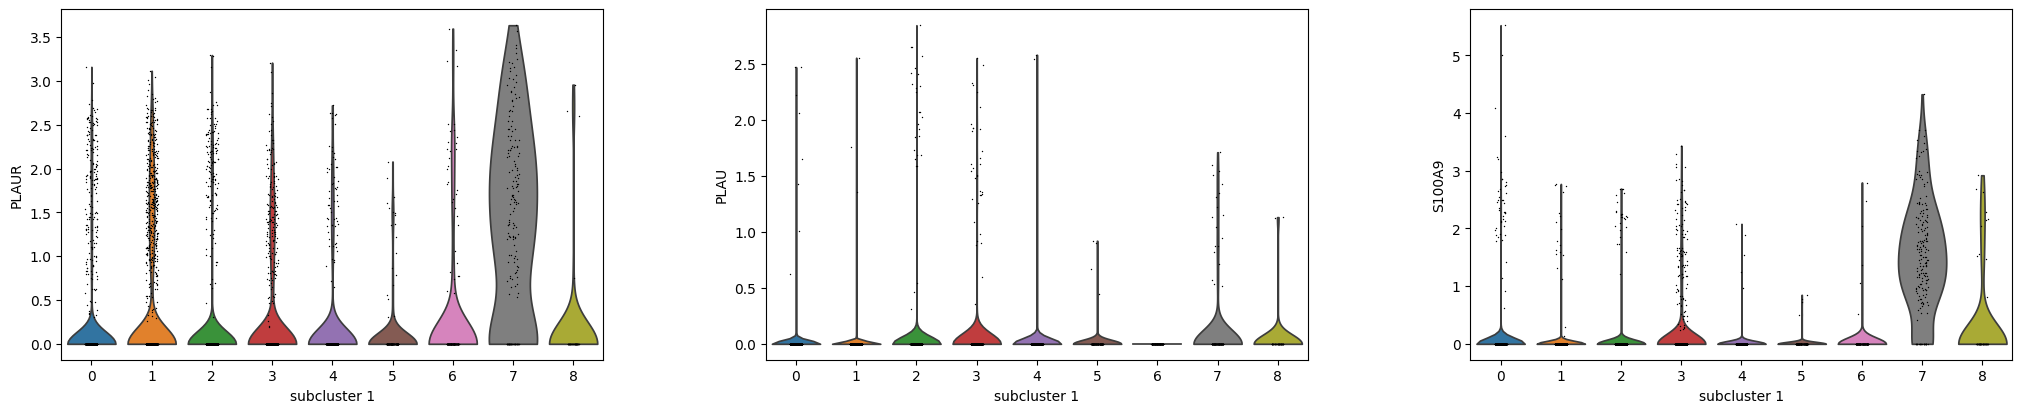

In [102]:
# Generate violin plots to visualize the distribution of selected gene expressions across different subclusters
sc.pl.violin(
    sub_adata,                            # The AnnData object containing the subset of data
    keys=['PLAUR', 'PLAU', 'S100A9'],   # List of genes for which to create violin plots
    groupby='subcluster_1'               # Group the data by 'subcluster_1' to compare distributions across subclusters
)

# Note:
# - The violin plot displays the distribution of gene expression levels for PLAUR, PLAU, and S100A9.
# - Each violin represents the density of cells expressing the gene within a specific subcluster.
# - This allows for an easy comparison of expression levels and distributions of the selected genes across different subclusters.


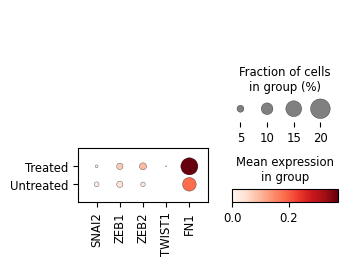

In [103]:
# Generate a dot plot to visualize the expression of EMT-related genes across different samples
sc.pl.dotplot(
    sub_adata,                             # The AnnData object containing the subset of data
    var_names=['SNAI2', 'ZEB1', 'ZEB2', 'TWIST1', 'FN1'],  # List of EMT-related genes to be displayed in the dot plot
    groupby='Sample'                       # Group the data by 'Sample' to compare gene expression across different samples
)

# Note:
# - The dot plot provides a visual representation of the expression levels of key EMT markers: SNAI2, ZEB1, ZEB2, TWIST1, and FN1.
# - Each dot represents the mean expression of a gene in a particular sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of EMT-related genes across different samples.


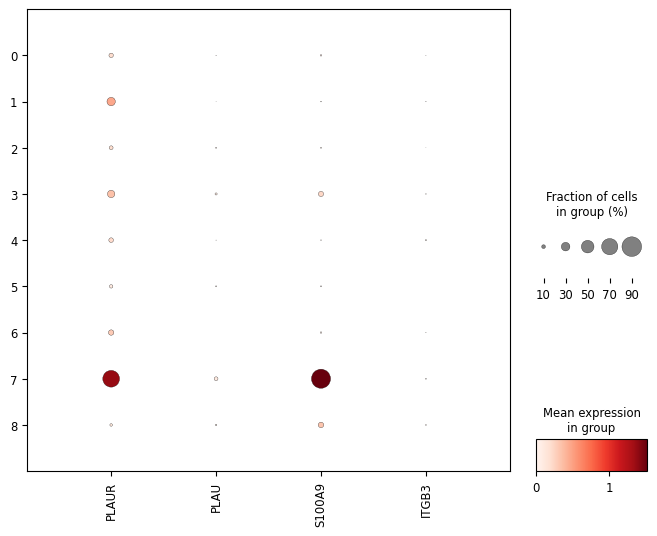

In [104]:
# Generate a dot plot to visualize the expression of specific genes across different subclusters
sc.pl.dotplot(
    sub_adata,                            # The AnnData object containing the subset of data
    var_names=['PLAUR', 'PLAU', 'S100A9', 'ITGB3'],  # List of genes to be displayed in the dot plot
    groupby='subcluster_1',              # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(8, 6)                        # Set the size of the figure
)

# Note:
# - This dot plot provides a visual representation of the expression levels of the genes PLAUR, PLAU, S100A9, and ITGB3.
# - Each dot represents the mean expression of a gene in a particular subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of these genes in different subclusters.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

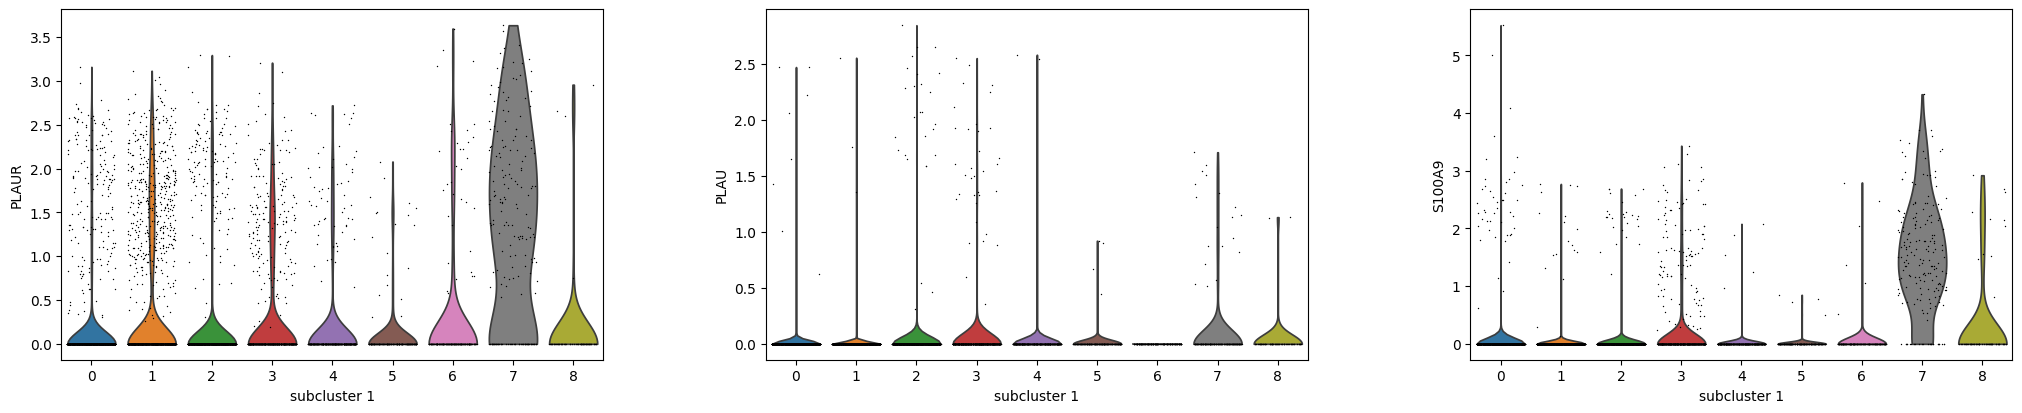

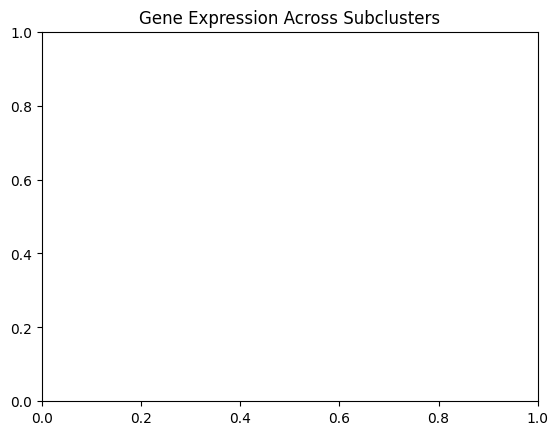

In [105]:
# Generate a violin plot to visualize the expression of specific genes across different subclusters
sc.pl.violin(
    sub_adata,                           # The AnnData object containing the subset of data
    keys=['PLAUR', 'PLAU', 'S100A9'],  # List of genes to be displayed in the violin plot
    groupby='subcluster_1',             # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    size=1,                              # Size of the violin plots
    jitter=0.4                           # Add jitter to the data points for better visibility
)

# Set the title for the plot using matplotlib
plt.title('Gene Expression Across Subclusters')  # Set the title for the plot
plt.show()  # Show the plot


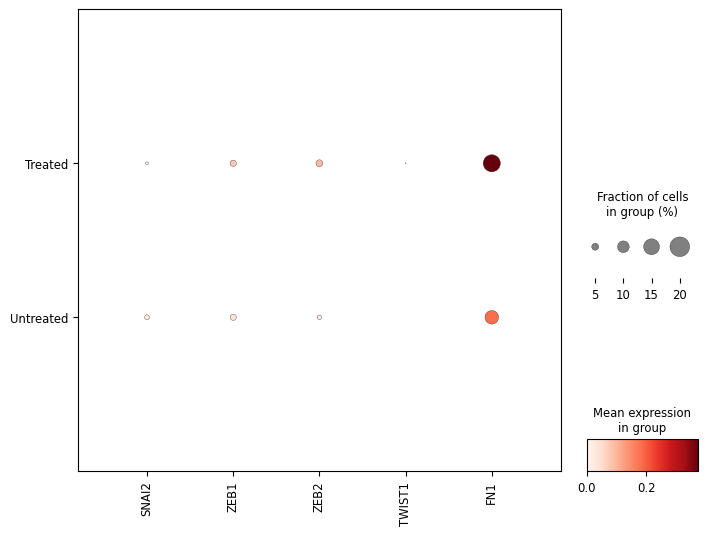

In [106]:
# Generate a dot plot to visualize the expression of EMT-related genes across different samples
sc.pl.dotplot(
    sub_adata,                            # The AnnData object containing the subset of data
    var_names=['SNAI2', 'ZEB1', 'ZEB2', 'TWIST1', 'FN1'],  # List of EMT-related genes to be displayed in the dot plot
    groupby='Sample',                     # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(8, 6)                        # Set the size of the figure for better visibility
)

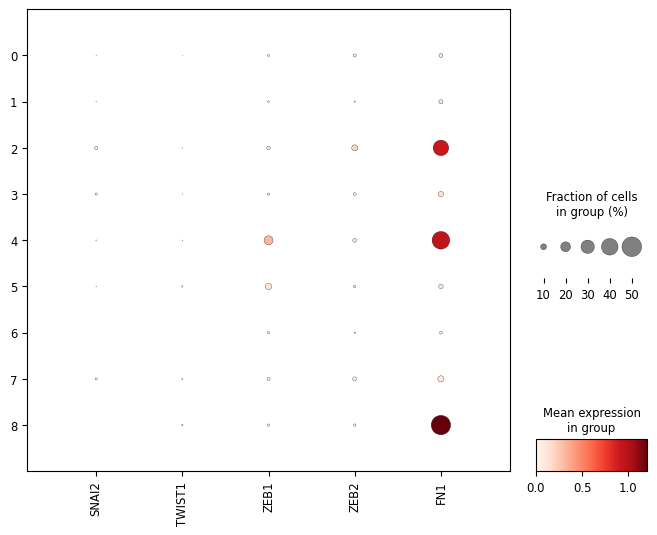

In [107]:
# Generate a dot plot to visualize the expression of EMT-related genes across different subclusters
sc.pl.dotplot(
    sub_adata,                              # The AnnData object containing the subset of data
    var_names=['SNAI2', 'TWIST1', 'ZEB1', 'ZEB2', 'FN1'],  # List of EMT-related genes to be displayed in the dot plot
    groupby='subcluster_1',                 # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(8, 6)                          # Set the size of the figure for better visibility
)

# Note:
# - The dot plot provides a visual representation of the expression levels of key EMT markers: SNAI2, TWIST1, ZEB1, ZEB2, and FN1.
# - Each dot represents the mean expression of a gene in a particular subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of EMT-related genes across different subclusters.


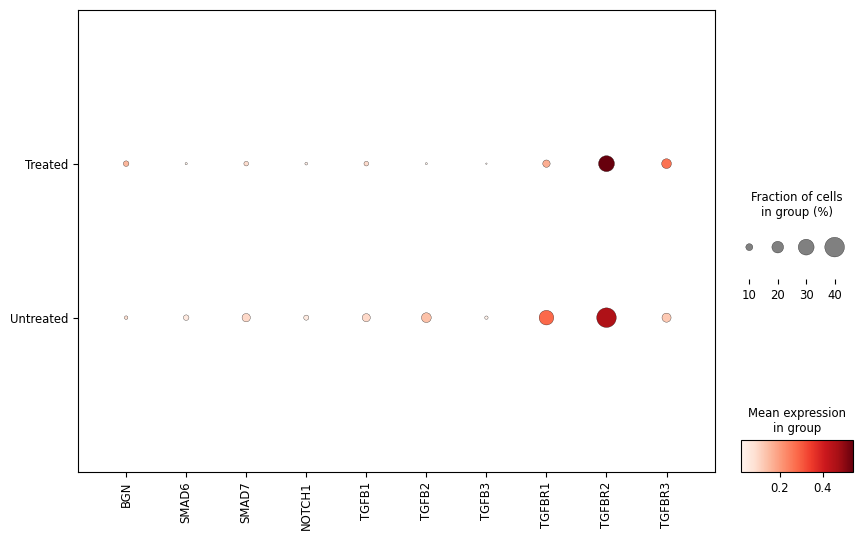

In [108]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different samples
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['BGN', 'SMAD6', 'SMAD7', 'NOTCH1',  # List of mesenchymal-like genes to be displayed in the dot plot
               'TGFB1', 'TGFB2', 'TGFB3', 'TGFBR1', 
               'TGFBR2', 'TGFBR3'],               
    groupby='Sample',                               # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(10, 6)                                # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: BGN, SMAD6, SMAD7, NOTCH1, TGFB1, TGFB2, TGFB3, and TGFBR receptors.
# - Each dot in the plot represents the mean expression of a gene in a specific sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot helps in understanding the expression patterns of mesenchymal-related genes across different samples.


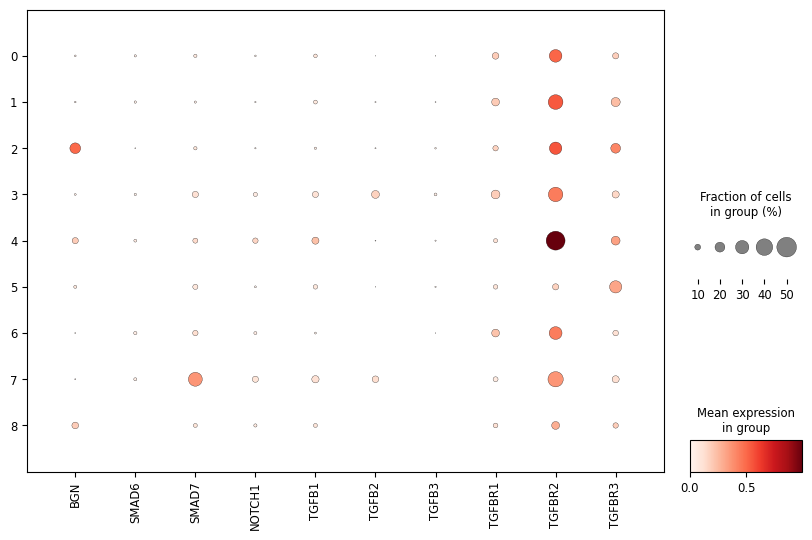

In [109]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different subclusters
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['BGN', 'SMAD6', 'SMAD7', 'NOTCH1',  # List of mesenchymal-like genes to be displayed in the dot plot
               'TGFB1', 'TGFB2', 'TGFB3', 'TGFBR1', 
               'TGFBR2', 'TGFBR3'],               
    groupby='subcluster_1',                        # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(10, 6)                                # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: BGN, SMAD6, SMAD7, NOTCH1, TGFB1, TGFB2, TGFB3, and TGFBR receptors.
# - Each dot in the plot represents the mean expression of a gene in a specific subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot helps in understanding the expression patterns of mesenchymal-related genes across different subclusters, providing insights into the heterogeneity of the cell populations.


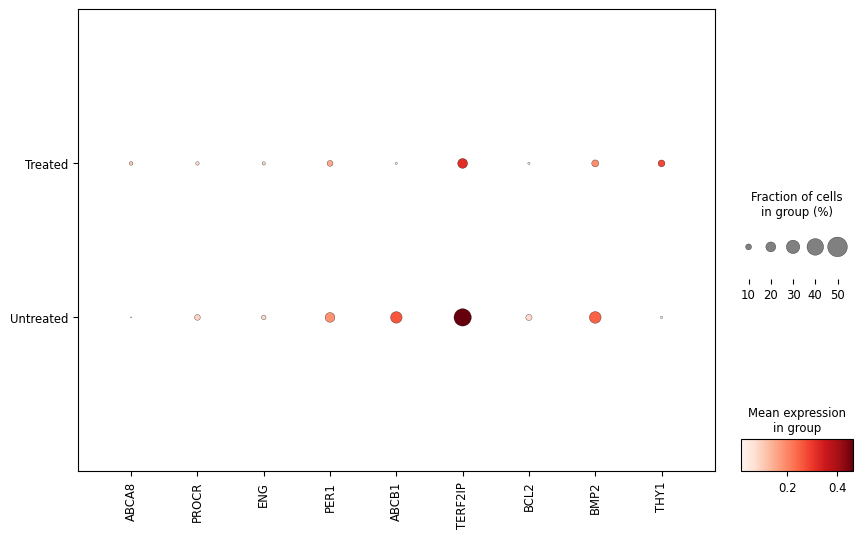

In [110]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different samples
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['ABCA8', 'PROCR', 'ENG', 'PER1',   # List of mesenchymal-like genes to be displayed in the dot plot
               'ABCB1', 'TERF2IP', 'BCL2', 'BMP2', 
               'THY1'],                             
    groupby='Sample',                               # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(10, 6)                                 # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: ABCA8, PROCR, ENG, PER1, ABCB1, TERF2IP, BCL2, BMP2, and THY1.
# - Each dot in the plot represents the mean expression of a gene in a specific sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot provides insights into the expression patterns of mesenchymal-related genes across different samples, helping to assess the variability in gene expression profiles.


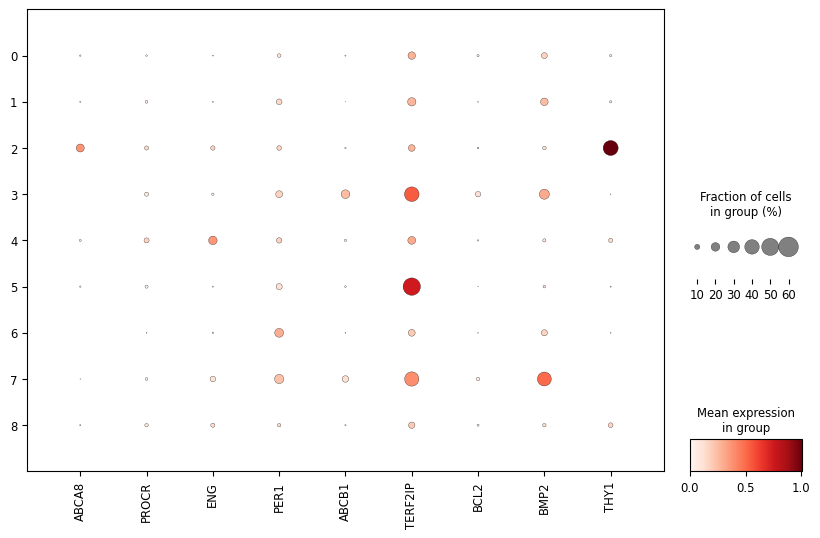

In [111]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different subclusters
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['ABCA8', 'PROCR', 'ENG', 'PER1',   # List of mesenchymal-like genes to be displayed in the dot plot
               'ABCB1', 'TERF2IP', 'BCL2', 'BMP2', 
               'THY1'],                             
    groupby='subcluster_1',                        # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(10, 6)                                 # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: ABCA8, PROCR, ENG, PER1, ABCB1, TERF2IP, BCL2, BMP2, and THY1.
# - Each dot in the plot represents the mean expression of a gene in a specific subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot provides insights into the expression patterns of mesenchymal-related genes across different subclusters, helping to assess the variability in gene expression profiles.


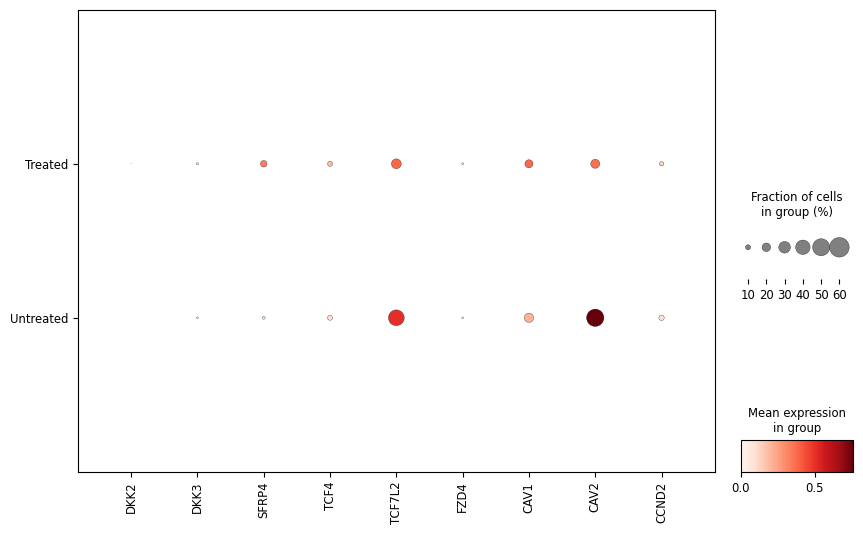

In [112]:
# Generate a dot plot to visualize the expression of additional mesenchymal-like genes across different samples
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['DKK2', 'DKK3', 'SFRP4',           # List of additional mesenchymal-like genes to be displayed in the dot plot
               'TCF4', 'TCF7L2', 'FZD4', 
               'CAV1', 'CAV2', 'CCND2'],          
    groupby='Sample',                               # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(10, 6)                                 # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: DKK2, DKK3, SFRP4, TCF4, TCF7L2, FZD4, CAV1, CAV2, and CCND2.
# - Each dot in the plot represents the mean expression of a gene in a specific sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot helps to assess the variability in gene expression profiles related to mesenchymal features across different samples.


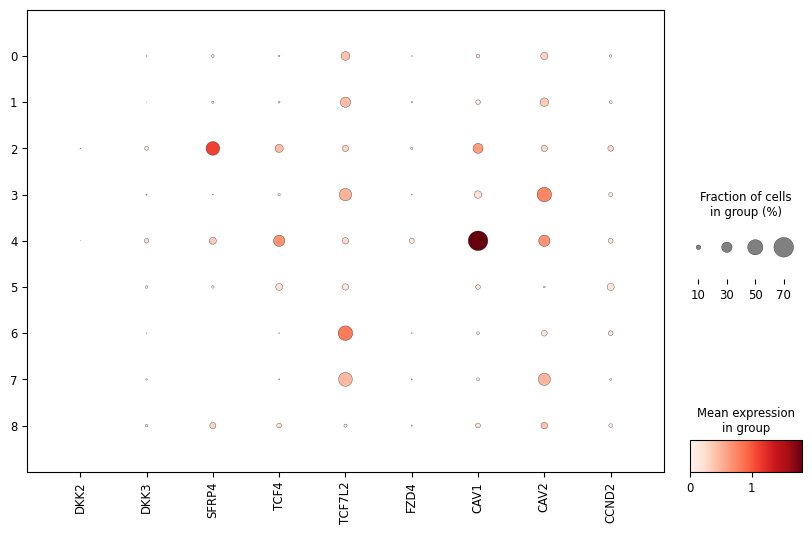

In [113]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different subclusters
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['DKK2', 'DKK3', 'SFRP4',           # List of mesenchymal-like genes to be displayed in the dot plot
               'TCF4', 'TCF7L2', 'FZD4', 
               'CAV1', 'CAV2', 'CCND2'],          
    groupby='subcluster_1',                         # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(10, 6)                                 # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: DKK2, DKK3, SFRP4, TCF4, TCF7L2, FZD4, CAV1, CAV2, and CCND2.
# - Each dot in the plot represents the mean expression of a gene in a specific subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot helps to assess how the expression of these mesenchymal markers varies among the different subclusters identified in your analysis.



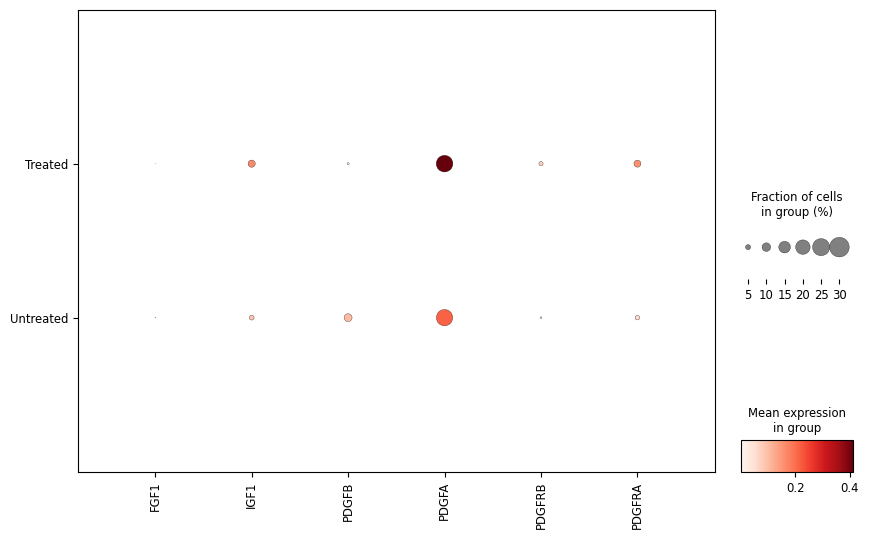

In [114]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different samples
sc.pl.dotplot(
    sub_adata,                                     # The AnnData object containing the subset of data
    var_names=['FGF1', 'IGF1', 'PDGFB',           # List of mesenchymal-like genes to be displayed in the dot plot
               'PDGFA', 'PDGFRB', 'PDGFRA'],      
    groupby='Sample',                              # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(10, 6)                                # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: FGF1, IGF1, PDGFB, PDGFA, PDGFRB, and PDGFRA.
# - Each dot in the plot represents the mean expression of a gene in a specific sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot helps to assess how the expression of these mesenchymal markers varies among different samples in your analysis.


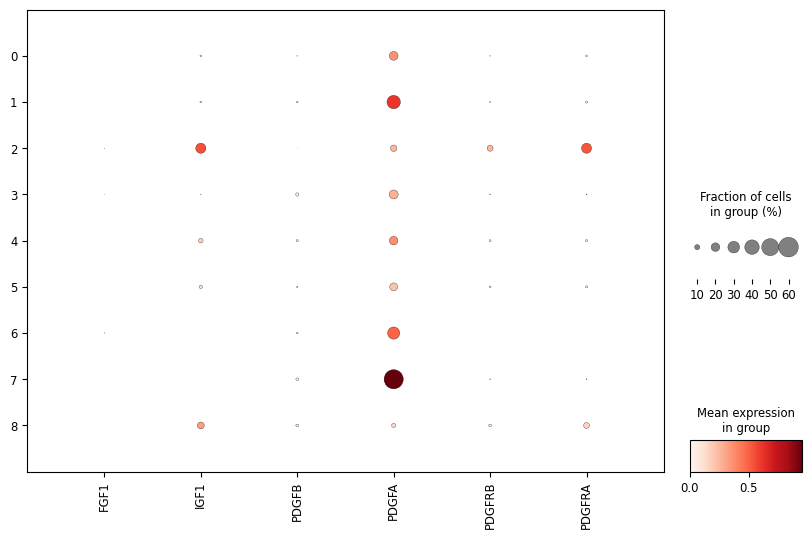

In [115]:
# Generate a dot plot to visualize the expression of mesenchymal-like genes across different subclusters
sc.pl.dotplot(
    sub_adata,                                     # The AnnData object containing the subset of data
    var_names=['FGF1', 'IGF1', 'PDGFB',           # List of mesenchymal-like genes to be displayed in the dot plot
               'PDGFA', 'PDGFRB', 'PDGFRA'],      
    groupby='subcluster_1',                        # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(10, 6)                                # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key mesenchymal markers: FGF1, IGF1, PDGFB, PDGFA, PDGFRB, and PDGFRA.
# - Each dot in the plot represents the mean expression of a gene in a specific subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot helps to assess how the expression of these mesenchymal markers varies among different subclusters in your analysis.


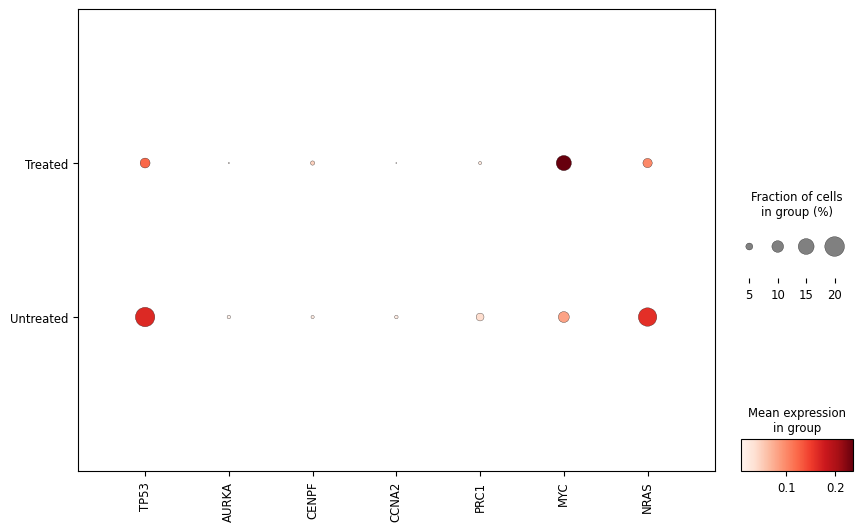

In [116]:
# Generate a dot plot to visualize the expression of key cancer-related genes across different samples
sc.pl.dotplot(
    sub_adata,                                     # The AnnData object containing the subset of data
    var_names=['TP53', 'AURKA', 'CENPF',         # List of genes to be displayed in the dot plot
               'CCNA2', 'PRC1', 'MYC', 'NRAS'],  
    groupby='Sample',                              # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(10, 6)                                # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key genes associated with cancer: TP53, AURKA, CENPF, CCNA2, PRC1, MYC, and NRAS.
# - Each dot in the plot represents the mean expression of a gene in a specific sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of important oncogenes and tumor suppressor genes across different samples.


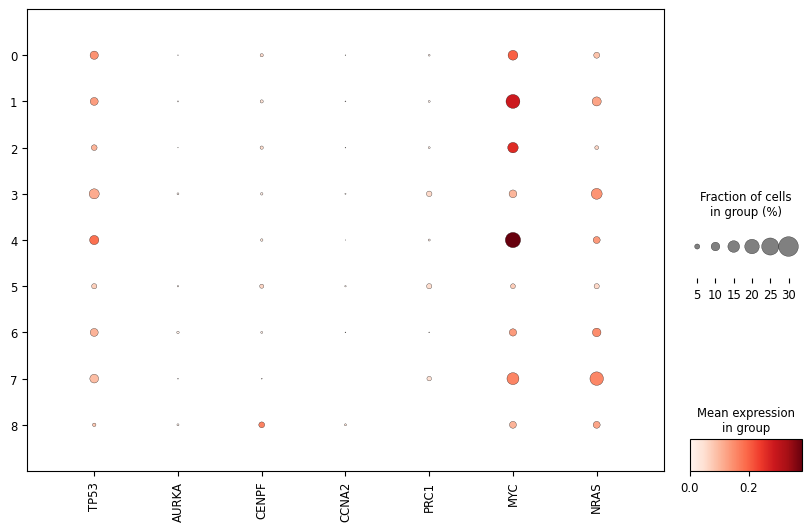

In [117]:
# Generate a dot plot to visualize the expression of key cancer-related genes across different subclusters
sc.pl.dotplot(
    sub_adata,                                     # The AnnData object containing the subset of data
    var_names=['TP53', 'AURKA', 'CENPF',         # List of genes to be displayed in the dot plot
               'CCNA2', 'PRC1', 'MYC', 'NRAS'],  
    groupby='subcluster_1',                        # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(10, 6)                                # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key genes associated with cancer: TP53, AURKA, CENPF, CCNA2, PRC1, MYC, and NRAS.
# - Each dot in the plot represents the mean expression of a gene in a specific subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of important oncogenes and tumor suppressor genes across different subclusters.


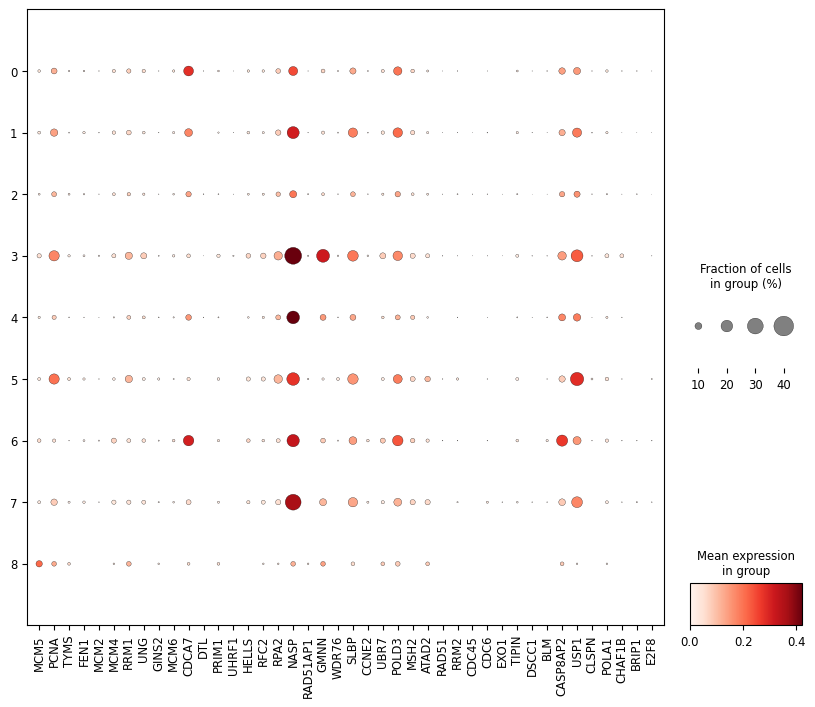

In [118]:
# Generate a dot plot to visualize the expression of S phase cell cycle genes across different subclusters
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=['MCM5', 'PCNA', 'TYMS', 'FEN1',    # List of S phase cell cycle genes to be displayed in the dot plot
               'MCM2', 'MCM4', 'RRM1', 'UNG', 
               'GINS2', 'MCM6', 'CDCA7', 'DTL', 
               'PRIM1', 'UHRF1', 'HELLS', 'RFC2', 
               'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 
               'WDR76', 'SLBP', 'CCNE2', 'UBR7', 
               'POLD3', 'MSH2', 'ATAD2', 'RAD51', 
               'RRM2', 'CDC45', 'CDC6', 'EXO1', 
               'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 
               'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 
               'BRIP1', 'E2F8'], 
    groupby='subcluster_1',                         # Group the data by 'subcluster_1' to compare gene expression across different subclusters
    figsize=(10, 8)                                 # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key genes involved in the S phase of the cell cycle.
# - Each dot represents the mean expression of a gene in a specific subcluster, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of S phase-related genes across different subclusters, helping to identify differences in cell cycle activity.


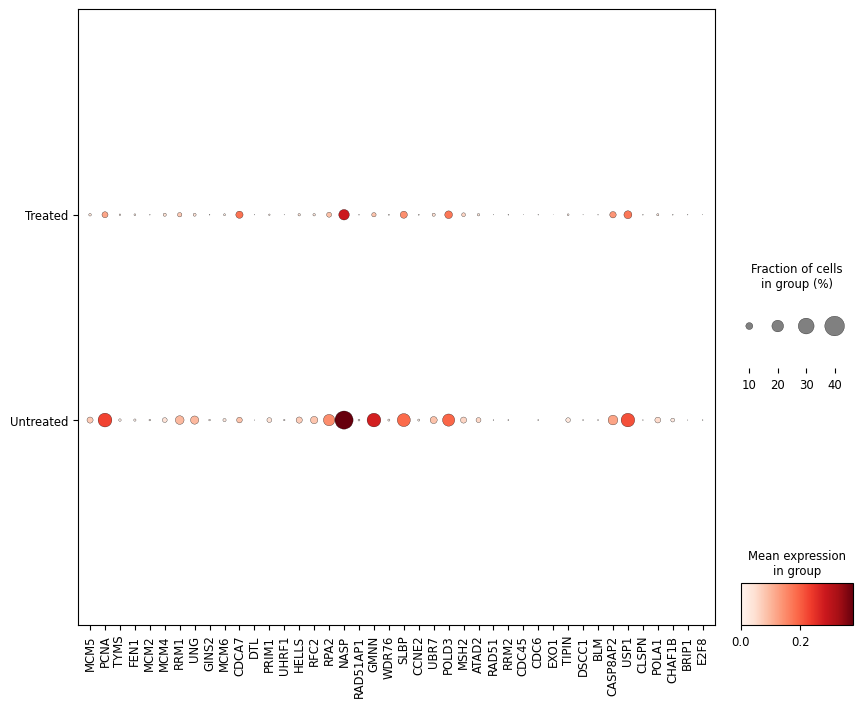

In [119]:
# Generate a dot plot to visualize the expression of S phase cell cycle genes across different samples
sc.pl.dotplot(
    sub_adata,                                      # The AnnData object containing the subset of data
    var_names=[
        'MCM5', 'PCNA', 'TYMS', 'FEN1',            # List of S phase cell cycle genes to be displayed in the dot plot
        'MCM2', 'MCM4', 'RRM1', 'UNG', 
        'GINS2', 'MCM6', 'CDCA7', 'DTL', 
        'PRIM1', 'UHRF1', 'HELLS', 'RFC2', 
        'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 
        'WDR76', 'SLBP', 'CCNE2', 'UBR7', 
        'POLD3', 'MSH2', 'ATAD2', 'RAD51', 
        'RRM2', 'CDC45', 'CDC6', 'EXO1', 
        'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 
        'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 
        'BRIP1', 'E2F8'                            # Continuation of S phase genes
    ],
    groupby='Sample',                               # Group the data by 'Sample' to compare gene expression across different samples
    figsize=(10, 8)                                 # Set the size of the figure for better visibility
)

# Note:
# - This dot plot visualizes the expression levels of key genes involved in the S phase of the cell cycle.
# - Each dot represents the mean expression of a gene in a specific sample, with the size of the dot corresponding to the number of cells expressing that gene.
# - This plot is useful for assessing the overall expression patterns of S phase-related genes across different samples, helping to identify differences in cell cycle activity.


In [120]:
sub_adata

AnnData object with n_obs × n_vars = 6331 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'score_sig', 'cell_type', 'cnv_leiden', 'cnv_score', 'PLAUR_Status_Binary', '_scvi_raw_norm_scaling', 'subcluster_1', 'cell_type_2'
    var: 'n_cells', 'chromosome', 'start', 'end'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cnv', 'cnv_leiden', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'rank_genes_groups', 'umap', 'subcluster_1', 'subcluster_1_colors', 'cell_type_2_colors'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'cnv

In [121]:
# Step: Create a new column 'cell_type_2' in the observation DataFrame of sub_adata
# This column will copy the values from the existing 'leiden' column to represent sub-cluster classifications.
sub_adata.obs['cell_type'] = sub_adata.obs['leiden']

# Verify that the new column has been added successfully
print("Unique labels in 'cell_type_2':", sub_adata.obs['cell_type_2'].unique())


Unique labels in 'cell_type_2': ['G1']
Categories (1, object): ['G1']


In [125]:
sub_adata.n_obs

6331

### Scoring Gene Function and Cell Cycle Function in Subcluster 2

In [126]:
# Gene list of interest: EMT (Epithelial-Mesenchymal Transition) Genes
gene_list_2 = list(set([
    'SNAI2', 'TWIST1', 'ZEB2', 'FN1', 'AHNAK', 'TMEM132A', 'WNT5A', 'SEMA5A', 
    'IFIT3', 'IRF1', 'ISG15', 'PSME1', 'CKMT1A', 'COL17A1', 'COL6A1', 'DCN', 
    'FBLN5', 'KLK8', 'KRT14', 'KRT6A', 'LAD1', 'PAMR1', 'PDGFRL', 'SAA1', 
    'SFRP1', 'SLPI', 'TFPI', 'TP63', 'SPP1', 'ANLN', 'CENPF', 'IRS2', 'EZR', 
    'CCND2'
]))  # Create a unique list of genes involved in EMT


In [134]:
from scipy.sparse import issparse


Variable names in sub_adata: ['AL627309.1', 'AL627309.3', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL669831.2', 'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.2', 'LINC02593', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'AL645608.7', 'HES4', 'ISG15', 'AL645608.1', 'AGRN', 'AL645608.8', 'RNF223', 'C1orf159', 'AL390719.3', 'LINC01342', 'AL390719.2', 'TTLL10-AS1', 'TTLL10', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'B3GALT6', 'C1QTNF12', 'AL162741.1', 'UBE2J2', 'LINC01786', 'SCNN1D', 'ACAP3', 'PUSL1', 'INTS11', 'AL139287.1', 'CPTP', 'TAS1R3', 'DVL1', 'MXRA8', 'AURKAIP1', 'CCNL2', 'MRPL20-AS1', 'MRPL20', 'AL391244.2', 'ANKRD65', 'LINC01770', 'VWA1', 'ATAD3C', 'ATAD3B', 'ATAD3A', 'TMEM240', 'SSU72', 'AL645728.1', 'FNDC10', 'AL691432.4', 'AL691432.2', 'MIB2', 'MMP23B', 'CDK11B', 'FO704657.1', 'SLC35E2B', 'CDK11A', 'SLC35E2A', 'NADK', 'GNB1', 'AL109917.1', 'CALML6', 'TMEM52', 'CFAP74', 'AL391845.2', 'GABRD', 'PRKCZ', 'AL590822.2', 'PRKCZ-AS1', 'FAAP20', 'SKI', 'AL590822.3', 

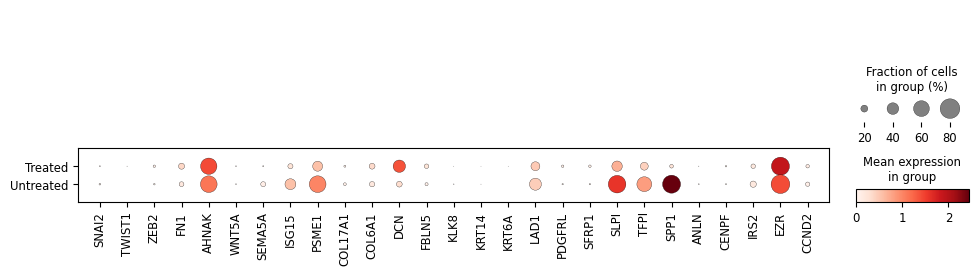

In [135]:
# First, check if sub_adata is empty
if sub_adata.n_obs == 0:
    raise ValueError("The sub_adata object is empty. Please check the filtering steps.")

# Check the variable names in sub_adata
print("Variable names in sub_adata:", sub_adata.var_names.tolist())

# Check expression data for the genes of interest
genes_of_interest = [
    'SNAI2', 'TWIST1', 'ZEB2', 'FN1', 'AHNAK',
    'WNT5A', 'SEMA5A', 'ISG15', 'PSME1',
    'COL17A1', 'COL6A1', 'DCN', 'FBLN5',
    'KLK8', 'KRT14', 'KRT6A', 'LAD1',
    'PDGFRL', 'SFRP1', 'SLPI', 'TFPI',
    'SPP1', 'ANLN', 'CENPF', 'IRS2',
    'EZR', 'CCND2'
]

# Create a list of genes present in sub_adata
present_genes = [gene for gene in genes_of_interest if gene in sub_adata.var_names]
print("Present genes in sub_adata:", present_genes)

# Check if expression data for present genes is non-empty
if present_genes:
    # Extract the expression data for the present genes
    expression_data = sub_adata[:, present_genes].X

    # Determine if expression_data is sparse or dense
    if issparse(expression_data):
        non_zero = expression_data.nnz  # Number of non-zero entries in sparse matrix
    else:
        non_zero = np.count_nonzero(expression_data)  # Number of non-zero entries in dense array

    # Check if there are any non-zero expression values
    if non_zero == 0:
        print("The expression data for present genes is empty. Please check your data.")
    else:
        # Generate the dot plot
        sc.pl.dotplot(
            sub_adata,                # The AnnData object containing the subset of data
            var_names=present_genes,  # Only include genes that are present
            groupby='Sample'          # Group the data by 'Sample'
        )
else:
    print("No valid genes found for the dot plot.")

In [136]:
# Load the AnnData object from the specified HDF5 file
# The file is located at the path defined by `base_data_path` and is named 'integrated_0.1.h5ad'
adata = sc.read_h5ad(f'{base_data_path}/integrated_0.1.h5ad')

# Display the loaded AnnData object to inspect its contents
adata


AnnData object with n_obs × n_vars = 73580 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [138]:
sc.tl.rank_genes_groups(adata, 'leiden')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


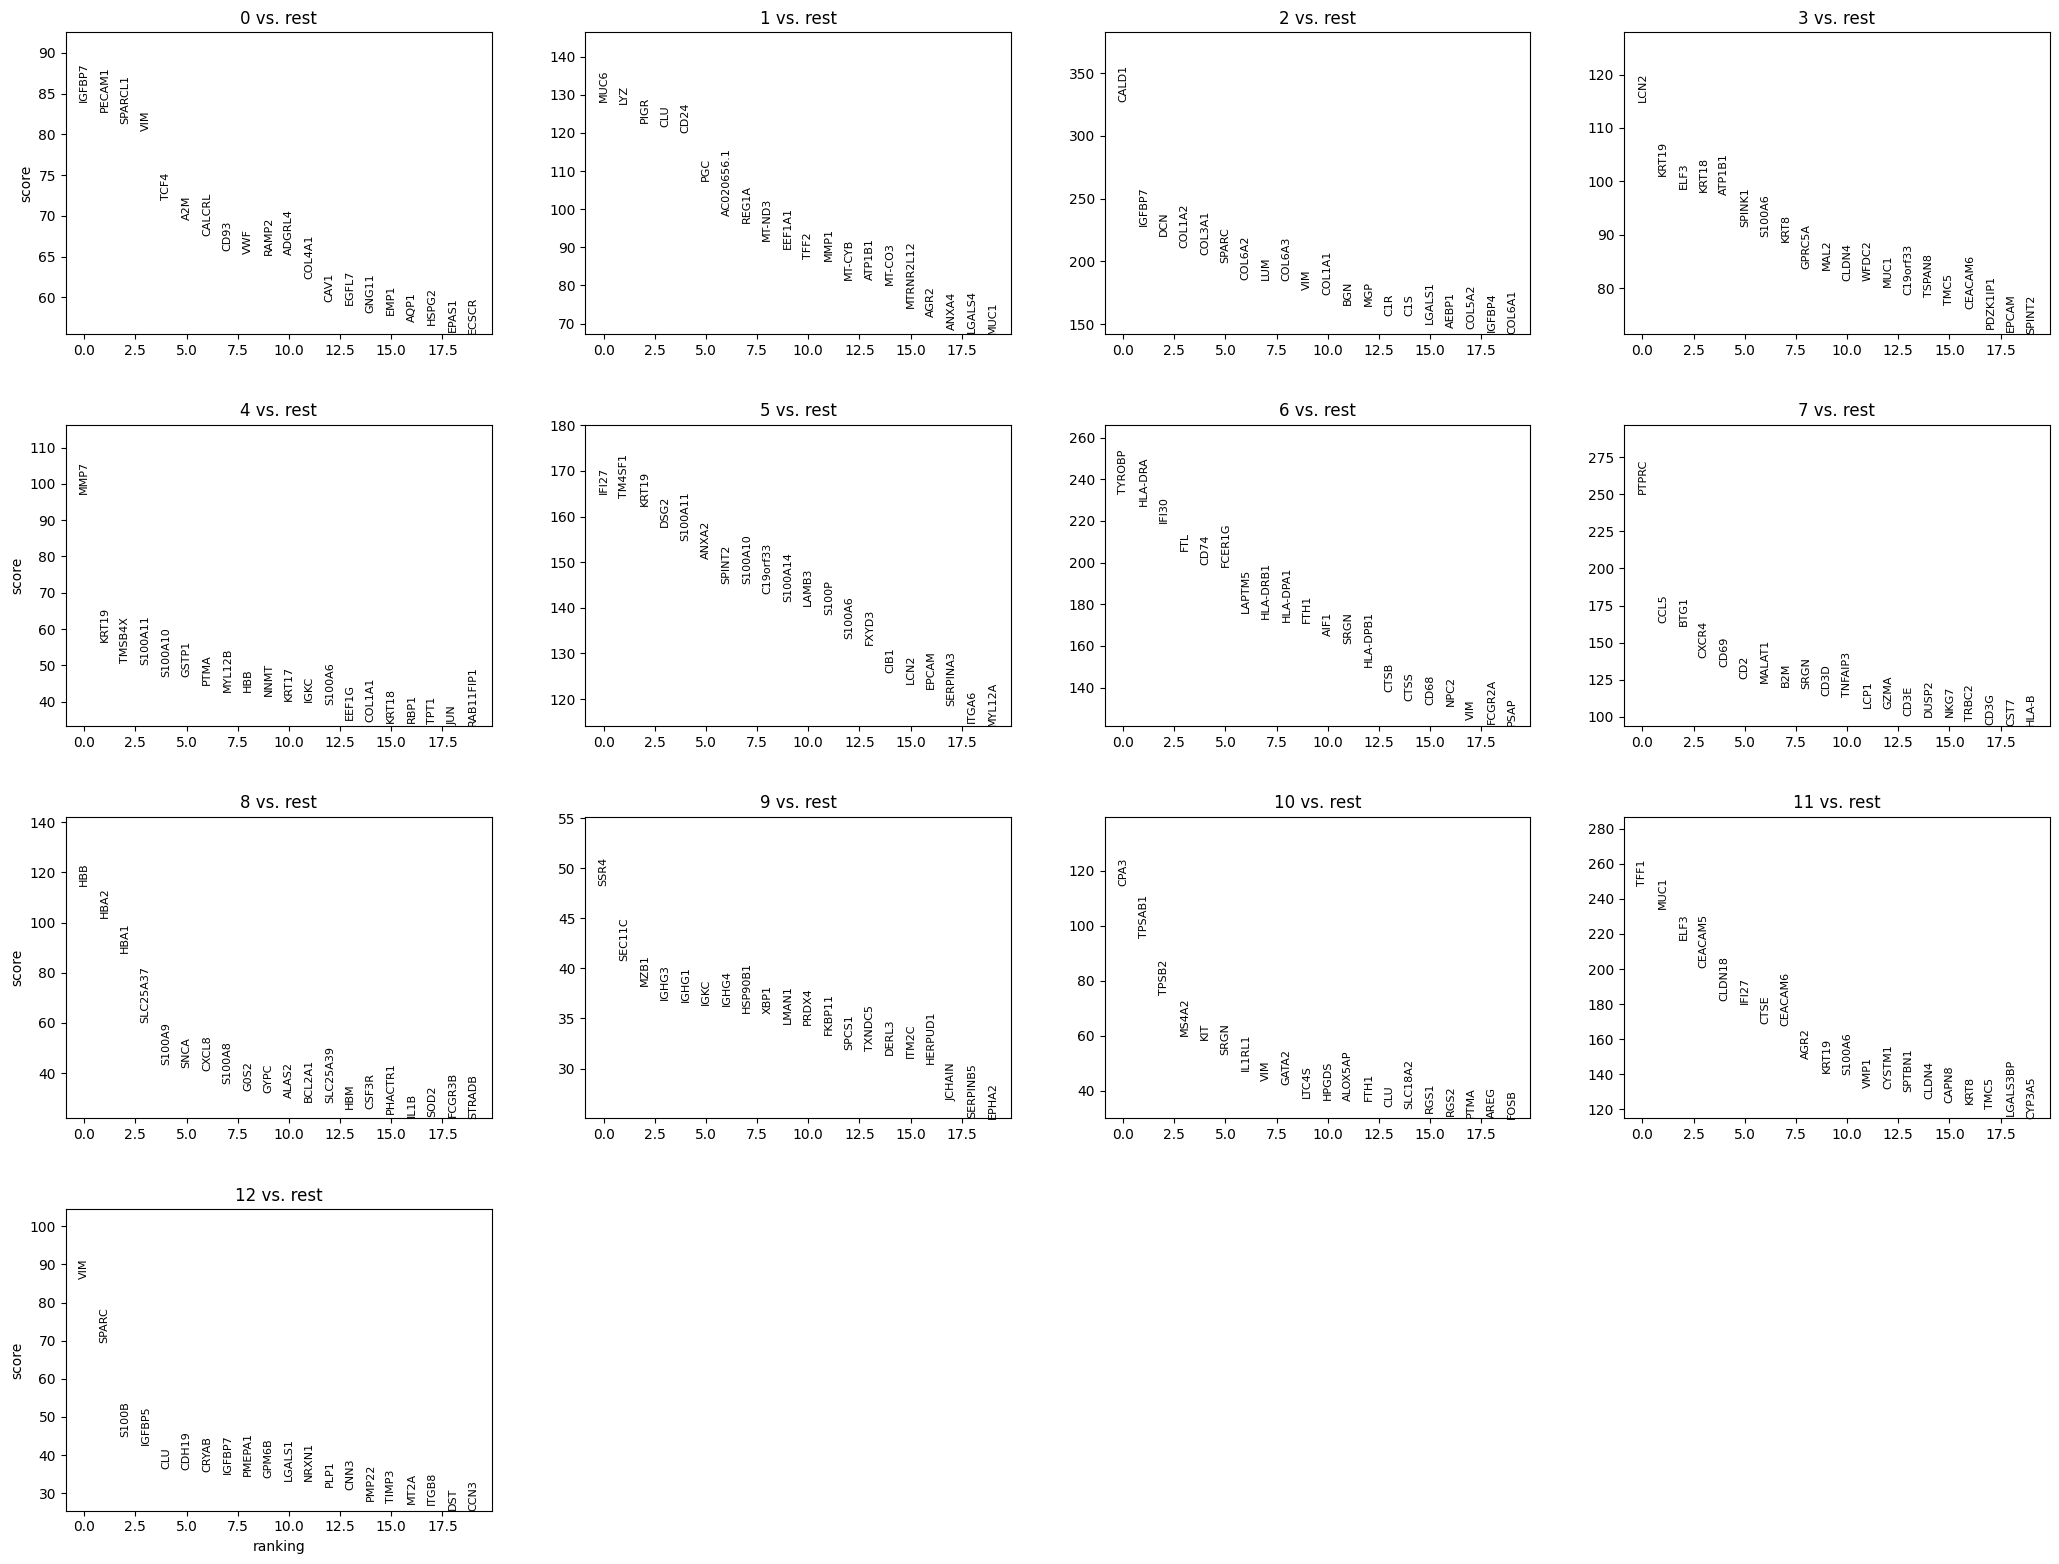

In [139]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [140]:
# Retrieve the ranked genes groups from the AnnData object `adata`
# The `None` argument specifies that we want to get all ranked genes, regardless of group
markers = sc.get.rank_genes_groups_df(adata, None)

# Filter the markers DataFrame to retain only those genes that meet the specified criteria:
# 1. Adjusted p-value is less than 0.05 (statistically significant)
# 2. Log fold change is greater than 0.5 (indicating a meaningful increase in expression)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

# Display the filtered markers DataFrame
markers


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,IGFBP7,83.988060,4.128526,0.000000,0.000000
1,0,PECAM1,82.775070,5.648146,0.000000,0.000000
2,0,SPARCL1,81.332420,4.738361,0.000000,0.000000
3,0,VIM,80.459953,2.720602,0.000000,0.000000
4,0,TCF4,71.922195,4.136458,0.000000,0.000000
...,...,...,...,...,...,...
324341,12,BMS1P14,2.170022,1.459278,0.030551,0.049577
324343,12,TMEM222,2.168734,0.700999,0.030648,0.049731
324344,12,PRRT2,2.168149,1.151407,0.030694,0.049799
324345,12,LURAP1L-AS1,2.168052,4.091801,0.030704,0.049812


In [141]:
# Create a new list of genes by filtering from the original gene list based on their presence in the markers DataFrame
gene_list_filtered_2 = [gene for gene in gene_list_2 if gene in markers['names'].values]

# Print the filtered gene list to check which genes were retained
print(gene_list_filtered_2)


['WNT5A', 'COL6A1', 'CKMT1A', 'DCN', 'TP63', 'SPP1', 'COL17A1', 'ISG15', 'FBLN5', 'TFPI', 'SLPI', 'PSME1', 'ZEB2', 'PAMR1', 'ANLN', 'TMEM132A', 'IFIT3', 'SEMA5A', 'TWIST1', 'IRS2', 'FN1', 'IRF1', 'KRT6A', 'KRT14', 'LAD1', 'AHNAK', 'PDGFRL', 'CCND2', 'SAA1', 'KLK8', 'SFRP1', 'SNAI2', 'CENPF', 'EZR']


In [142]:
#score calc, gene list of interest vs entire gene pool
sc.tl.score_genes(sub_adata, gene_list_filtered_2, score_name = 'score_sig_2')

In [143]:
#check to see new column with your score_name
sub_adata.obs


,Sample,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,_scvi_batch,...,conf_score,score_sig,cell_type,cnv_leiden,cnv_score,PLAUR_Status_Binary,_scvi_raw_norm_scaling,subcluster_1,cell_type_2,score_sig_2
AAAGGTAGTTGGCCTG-1,Treated,False,959,1598.0,212.0,13.266582,46.0,2.878598,959,0,...,0.196910,-0.114838,1,0,0.005460,PLAUR-,6.455778,6,G1,0.097892
AAAGTGAAGCGTATGG-1,Treated,False,3939,14390.0,1521.0,10.569839,1379.0,9.583044,3939,0,...,0.999997,-0.205043,1,7,0.004686,PLAUR-,0.769172,5,G1,0.053881
AACAACCCAAACGGCA-1,Treated,False,728,1043.0,59.0,5.656759,46.0,4.410355,728,0,...,0.072578,-0.091059,1,14,0.007971,PLAUR-,10.040160,6,G1,-0.021858
AACAGGGGTGCTCTTC-1,Treated,False,556,837.0,23.0,2.747909,14.0,1.672640,556,0,...,0.170352,0.026407,1,9,0.005086,PLAUR-,12.135922,6,G1,0.158147
AACCACACAGTCAGTT-1,Treated,False,534,861.0,24.0,2.787457,147.0,17.073172,534,0,...,0.221480,-0.102858,1,7,0.004686,PLAUR-,14.005603,6,G1,0.195501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATGATCTCCACAAGT-1,Untreated,False,1900,4241.0,544.0,12.827164,70.0,1.650554,1900,0,...,0.927611,-0.088328,1,7,0.004686,PLAUR+,2.398082,7,G1,0.146153
GTGTAACAGCTGTACT-1,Untreated,False,5620,26315.0,1832.0,6.961809,1490.0,5.662169,5620,0,...,0.998676,-0.273211,1,7,0.004686,PLAUR-,0.403161,6,G1,-0.042851
TAAGCACCATCGAGCC-1-2,Untreated,False,778,1188.0,140.0,11.784512,142.0,11.952862,778,0,...,0.022560,-0.089497,1,3,0.004628,PLAUR-,9.578544,3,G1,0.193794
TCTACCGCATCGCTAA-1,Untreated,False,4477,14937.0,23.0,0.153980,426.0,2.851978,4477,0,...,1.000000,-0.238228,1,7,0.004686,PLAUR-,0.689227,6,G1,-0.087353


In [144]:
# Extract UMAP coordinates from the 'sub_adata' object
# These coordinates are stored in the 'obsm' attribute under the key 'X_umap'
umap_coords = sub_adata.obsm['X_umap']

# Extract the scores for a specific variable (e.g., 'score_sig_2') from the 'obs' attribute of 'sub_adata'
# This series contains scores that can be visualized against the UMAP coordinates
scores = sub_adata.obs['score_sig_2']


In [145]:
scores

AAAGGTAGTTGGCCTG-1      0.097892
AAAGTGAAGCGTATGG-1      0.053881
AACAACCCAAACGGCA-1     -0.021858
AACAGGGGTGCTCTTC-1      0.158147
AACCACACAGTCAGTT-1      0.195501
                          ...   
GATGATCTCCACAAGT-1      0.146153
GTGTAACAGCTGTACT-1     -0.042851
TAAGCACCATCGAGCC-1-2    0.193794
TCTACCGCATCGCTAA-1     -0.087353
TTTCAGTAGGAAAGGT-1      0.106936
Name: score_sig_2, Length: 6331, dtype: float64

<Figure size 1000x800 with 0 Axes>

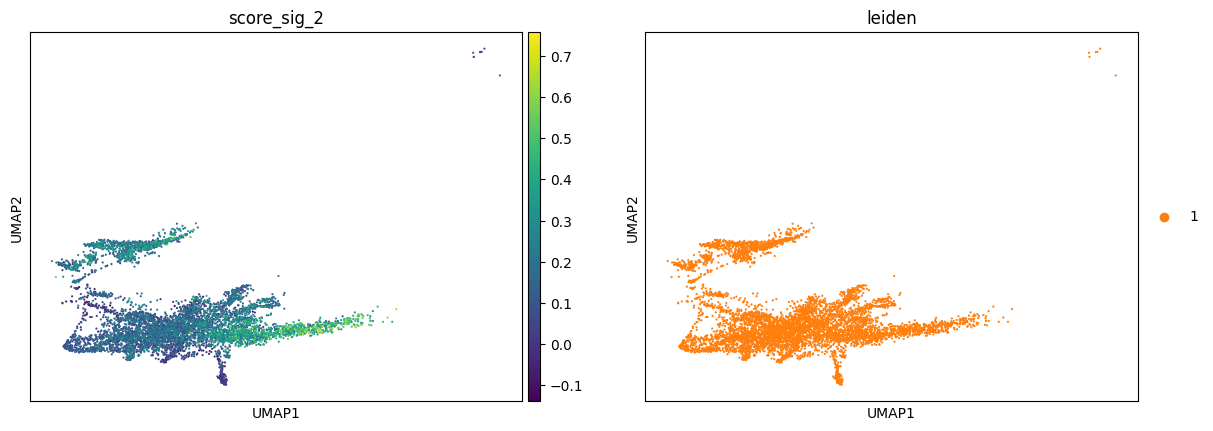

In [146]:
# Set the figure size for the UMAP plot
plt.figure(figsize=(10, 8))

# Generate a UMAP plot for the 'sub_adata' object
# Color the points based on 'score_sig_2' and the 'leiden' clustering results
# 'viridis' colormap will be used to color the scores
# The 'size' parameter controls the size of the plotted points
sc.pl.umap(sub_adata, color=['score_sig_2', 'leiden'], cmap='viridis', size=10)

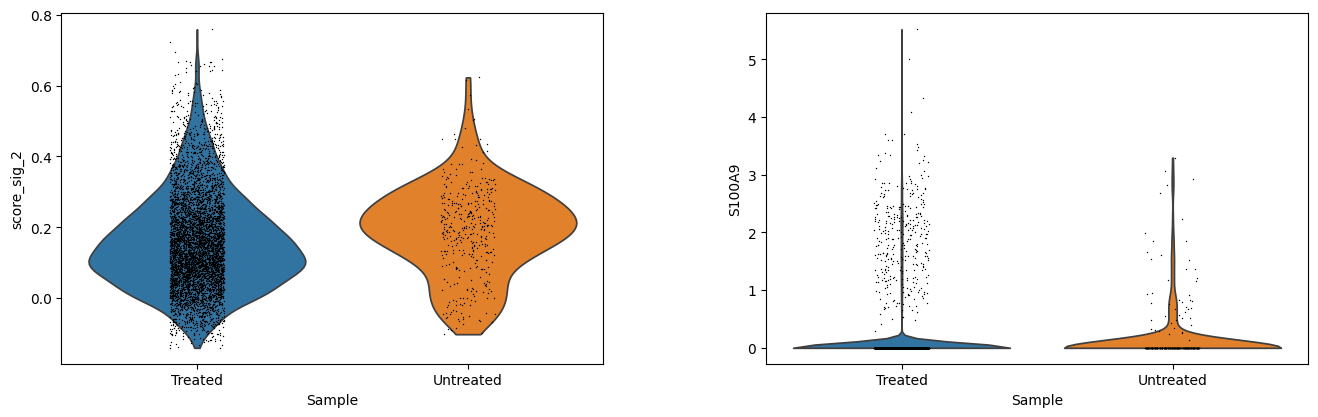

In [147]:
# Generate a violin plot to visualize the distribution of specific gene scores across different samples
sc.pl.violin(
    sub_adata,                      # The AnnData object containing the subset of data
    keys=['score_sig_2', 'S100A9'],  # List of genes or scores to be displayed in the violin plot
    groupby='Sample',               # Group the data by 'Sample' to compare distributions across different samples
    # layer='scvi_normalized'        # Uncomment this line if you want to use the 'scvi_normalized' layer for expression values
)

# Note:
# - The violin plot provides a visual representation of the distribution of expression levels of the specified genes (score_sig_2 and S100A9) across the different samples.
# - Each violin shape shows the density of gene expression at different levels, allowing for easy comparison between samples.


In [149]:
# Example of running clustering, replace the resolution as needed
sc.tl.leiden(sub_adata, resolution=0.25, key_added='subcluster_2')


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

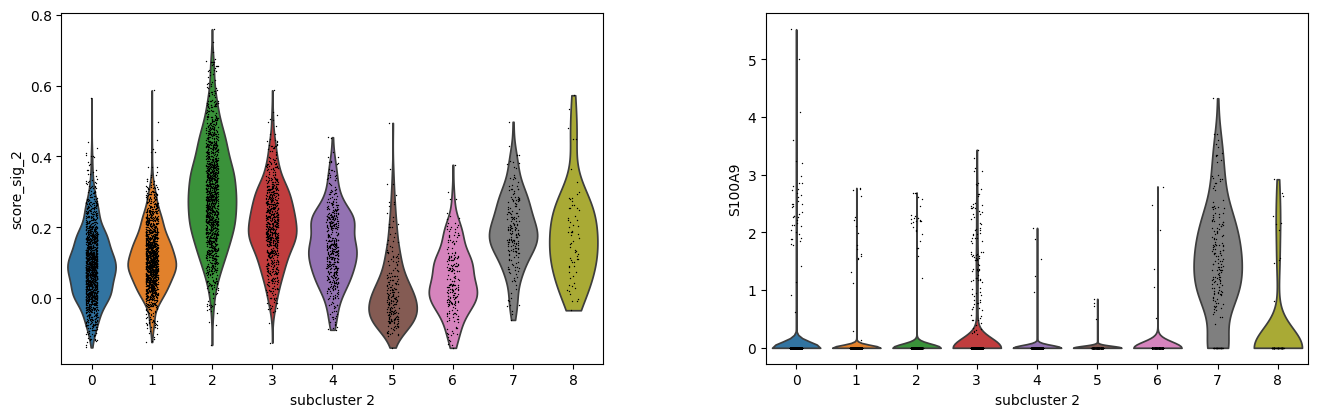

In [150]:
# Generate a violin plot to visualize the distribution of scores and gene expression across different subclusters
sc.pl.violin(
    sub_adata,                      # The AnnData object containing the subset of data
    keys=['score_sig_2', 'S100A9'],  # List of scores and genes to be displayed in the violin plot
    groupby='subcluster_2'         # Group the data by 'subcluster_2' to compare distributions across different subclusters
)

# Note:
# - The violin plot provides a visual representation of the distribution of the specified score (score_sig_2) and gene expression (S100A9) across the different subclusters.
# - Each violin shape shows the density of the data at different levels, allowing for easy comparison between subclusters.


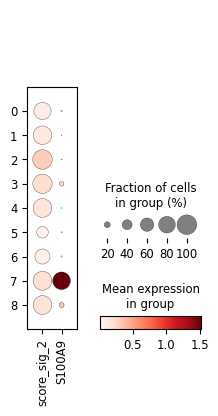

In [151]:
sc.pl.dotplot(sub_adata, ['score_sig_2', 'S100A9'], groupby='subcluster_2')

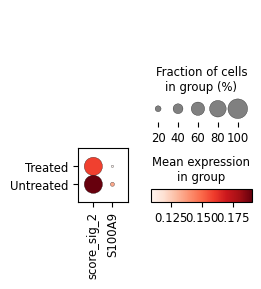

In [152]:
sc.pl.dotplot(sub_adata, ['score_sig_2', 'S100A9'], groupby='Sample')

In [153]:
# Define G1S and G2M gene sets based on Tirosh et al.
G1S_genes_Tirosh = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 
    'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 
    'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 
    'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 
    'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 
    'BRIP1', 'E2F8'
]

G2M_genes_Tirosh = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 
    'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A', 
    'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 
    'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'HN1', 'CDC20', 'TTK', 
    'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 
    'ECT2', 'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 
    'CENPE', 'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]

# Combine G1S and G2M gene lists into a single list for cell cycle genes
cell_cycle_genes = G1S_genes_Tirosh + G2M_genes_Tirosh

# Print the total number of genes in the combined cell cycle list
print("Total number of cell cycle genes:", len(cell_cycle_genes))

Total number of cell cycle genes: 97


In [154]:
# Define specific sets for S phase and G2M phase genes
s_genes = G1S_genes_Tirosh
g2m_genes = G2M_genes_Tirosh

# Filter the combined list to include only genes present in the sub_adata variable names
cell_cycle_genes = [x for x in cell_cycle_genes if x in sub_adata.var_names]

# Print the number of cell cycle genes present in sub_adata
print("Number of cell cycle genes present in sub_adata:", len(cell_cycle_genes))

# Identify and print any genes from the original sets that are missing in the filtered list
missing_genes = set(G1S_genes_Tirosh + G2M_genes_Tirosh) - set(cell_cycle_genes)
print("Missing genes from the cell cycle gene list:", missing_genes)

Number of cell cycle genes present in sub_adata: 94
Missing genes from the cell cycle gene list: {'MLF1IP', 'HN1', 'FAM64A'}


In [155]:
import scipy.stats as stats

In [156]:
# Step 1: Extract the score values for the 'Treated' sample group
a = sub_adata[sub_adata.obs.Sample == 'Treated'].obs.score_sig_2.values

# Step 2: Extract the score values for the 'Untreated' sample group
b = sub_adata[sub_adata.obs.Sample == 'Untreated'].obs.score_sig_2.values

# Step 3: Perform the Mann-Whitney U test to compare the distributions of the scores
# This test assesses whether the distributions of the two independent samples are different
mann_whitney_result = stats.mannwhitneyu(a, b)

# Step 4: Output the result of the Mann-Whitney U test
print("Mann-Whitney U test statistic:", mann_whitney_result.statistic)
print("P-value:", mann_whitney_result.pvalue)

Mann-Whitney U test statistic: 948709.0
P-value: 8.05916749055264e-10


In [157]:
# Step: Score Cell Cycle Gene Function
# This function calculates the scores for S phase and G2/M phase genes in the provided AnnData object.

# Parameters:
# - sub_adata: The AnnData object containing the subset of data
# - s_genes: A list of genes associated with the S phase of the cell cycle
# - g2m_genes: A list of genes associated with the G2/M phase of the cell cycle
# - copy: If set to True, a copy of the data will be returned without modifying the original object

sc.tl.score_genes_cell_cycle(sub_adata, s_genes, g2m_genes, copy=False)

# Note:
# - The function will compute the scores for S and G2/M phases based on the expression levels of the specified genes.
# - The resulting scores will be stored in the `sub_adata` object, allowing further analysis and visualization.


/var/folders/d1/z52n225j7jl7n5v2t5tb35n80000gn/T/ipykernel_46042/3675912469.py:10: FutureWarning: The specified parameters ('s_genes', 'g2m_genes') are no longer positional. Please specify them like `s_genes=['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8']`
  sc.tl.score_genes_cell_cycle(sub_adata, s_genes, g2m_genes, copy=False)


... storing 'phase' as categorical


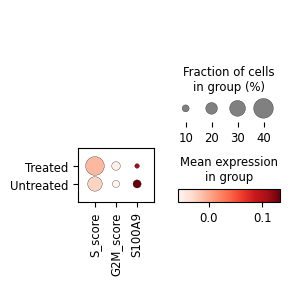

In [158]:
sc.pl.dotplot(sub_adata, ['S_score', 'G2M_score', 'S100A9'], groupby='Sample')

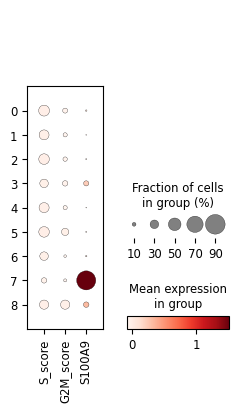

In [159]:
sc.pl.dotplot(sub_adata, ['S_score', 'G2M_score', 'S100A9'], groupby='subcluster_2')

<Figure size 1000x800 with 0 Axes>

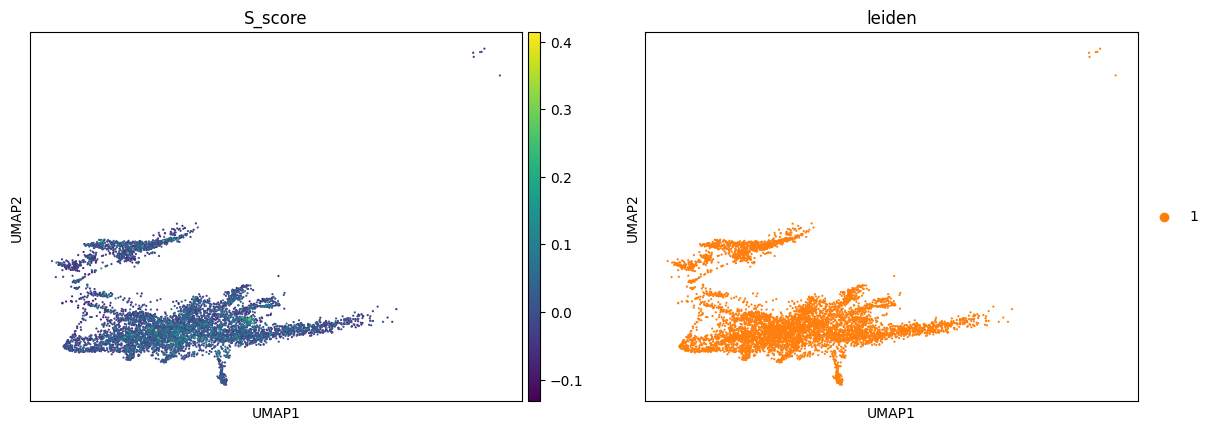

In [160]:
# Step: Visualize UMAP with Cell Cycle Scores and Clustering Information

# Create a new figure with specified dimensions
plt.figure(figsize=(10, 8))

# Generate a UMAP plot using the sub_adata object
# - color: Specifies which attributes to color the points by
#   'S_score' represents the S phase score of the cells,
#   'leiden' represents the cluster assignments from the Leiden algorithm.
# - cmap: The colormap used for coloring points in the plot; 'viridis' is a perceptually uniform colormap.
# - size: Size of the points in the plot
sc.pl.umap(sub_adata, color=['S_score', 'leiden'], cmap='viridis', size=10)

# Note:
# - The resulting UMAP plot will provide insights into the distribution of cells based on their S phase scores,
#   along with their clustering, allowing for visualization of how different clusters relate to cell cycle activity.


<Figure size 1000x800 with 0 Axes>

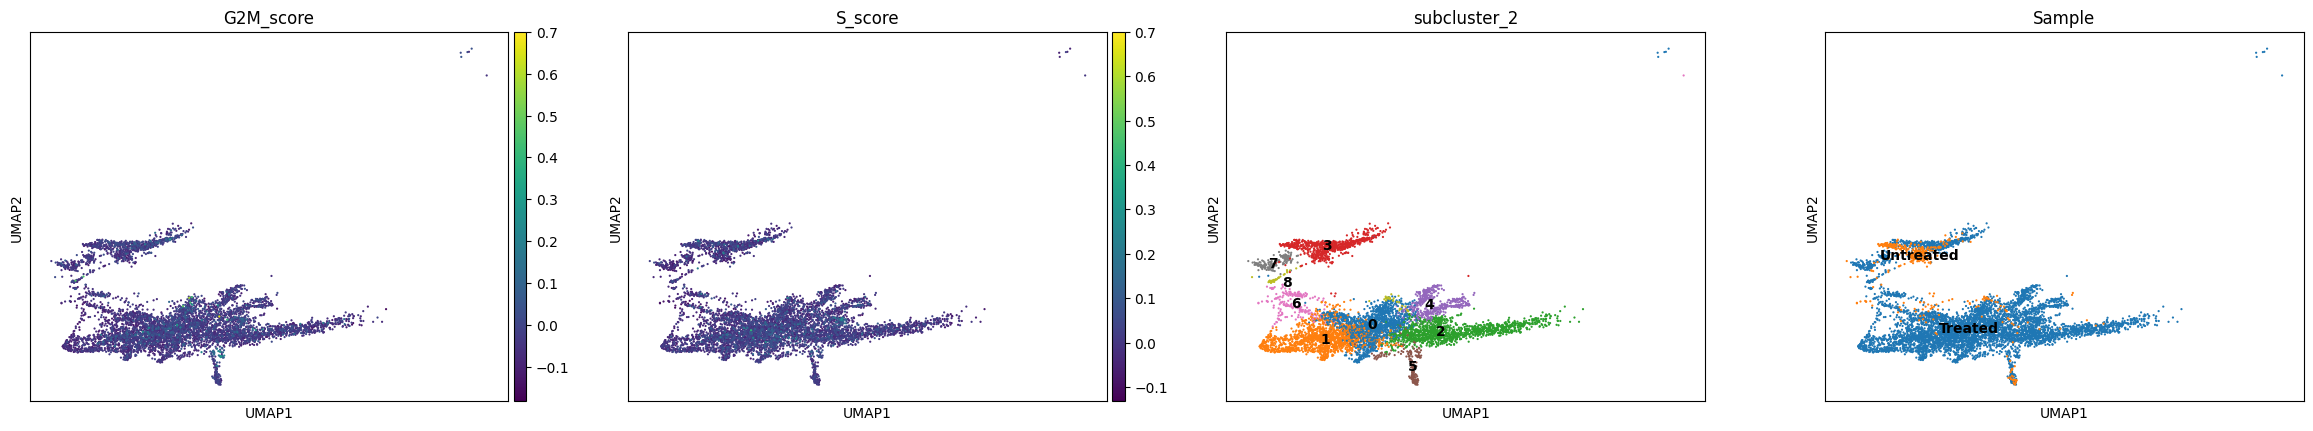

In [161]:
# Step: Visualize UMAP with G2M and S Phase Scores, Subcluster, and Sample Information

# Create a new figure with specified dimensions
plt.figure(figsize=(10, 8))

# Generate a UMAP plot using the sub_adata object
# - color: Specifies which attributes to color the points by
#   'G2M_score' represents the G2M phase score of the cells,
#   'S_score' represents the S phase score,
#   'subcluster_2' indicates the subcluster assignments,
#   'Sample' differentiates between different sample types.
# - vmax: Sets the maximum value for the colormap, which can help in normalizing the color scale
# - cmap: The colormap used for coloring points in the plot; 'viridis' is a perceptually uniform colormap.
# - legend_loc: Location of the legend on the plot; 'on data' places it directly on the plot for better visibility.
# - size: Size of the points in the plot
sc.pl.umap(
    sub_adata, 
    color=['G2M_score', 'S_score', 'subcluster_2', 'Sample'], 
    vmax=0.7, 
    cmap='viridis', 
    legend_loc='on data', 
    size=10
)

# Note:
# - The resulting UMAP plot will visually represent the distribution of cells based on their G2M and S phase scores,
#   while also indicating which subcluster they belong to and the sample type,
#   allowing for a comprehensive understanding of the relationships within the dataset.


In [162]:
# Step: Perform Mann-Whitney U test to compare G2M scores between treated and untreated samples

# Extract G2M scores for treated samples
a = sub_adata[sub_adata.obs.Sample == 'Treated'].obs.G2M_score.values

# Extract G2M scores for untreated samples
b = sub_adata[sub_adata.obs.Sample == 'Untreated'].obs.G2M_score.values

# Perform the Mann-Whitney U test
# This test compares the distributions of the G2M scores between the two groups (Treated vs. Untreated).
# It is a non-parametric test that does not assume normality of the data.
statistic, p_value = stats.mannwhitneyu(a, b)

# Print the results of the Mann-Whitney U test
print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {p_value}")


Mann-Whitney U test statistic: 1245651.0
P-value: 0.019894390721138636


In [163]:
# Step: Perform Mann-Whitney U test to compare S scores between treated and untreated samples

# Extract S scores for treated samples
a = sub_adata[sub_adata.obs.Sample == 'Treated'].obs.S_score.values

# Extract S scores for untreated samples
b = sub_adata[sub_adata.obs.Sample == 'Untreated'].obs.S_score.values

# Perform the Mann-Whitney U test
# This test compares the distributions of the S scores between the two groups (Treated vs. Untreated).
# It is a non-parametric test that does not assume normality of the data.
statistic, p_value = stats.mannwhitneyu(a, b)

# Print the results of the Mann-Whitney U test
print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {p_value}")


Mann-Whitney U test statistic: 1368026.0
P-value: 5.890299354606905e-09


## Statistical Analysis of Genes of Interest in Cluster 2

In [164]:
# Step 1: Identify index of the PLAUR gene in var_names
plaur_index = np.where(sub_adata.var_names == "PLAUR")[0][0]

# Step 2: Retrieve PLAUR expression values for Treated and Untreated samples
# Convert sparse matrix to dense format
plaur_treated = sub_adata[sub_adata.obs["Sample"] == "Treated"].X[:, plaur_index].toarray().flatten()
plaur_untreated = sub_adata[sub_adata.obs["Sample"] == "Untreated"].X[:, plaur_index].toarray().flatten()

# Step 3: Conduct the Mann-Whitney U Test
result = stats.mannwhitneyu(plaur_treated, plaur_untreated)

# Display the result
print("Mann-Whitney U Test for PLAUR expression (Treated vs. Untreated):")
print(f"U-statistic: {result.statistic:.3f}, p-value: {result.pvalue:.3e}")


Mann-Whitney U Test for PLAUR expression (Treated vs. Untreated):
U-statistic: 1237943.000, p-value: 2.063e-03


In [165]:
# Step 1: Identify the index of the TP53 gene in var_names
tp53_index = np.where(sub_adata.var_names == "TP53")[0][0]

# Step 2: Retrieve TP53 expression values for Treated and Untreated samples
# Convert sparse matrix to dense format
tp53_treated = sub_adata[sub_adata.obs["Sample"] == "Treated"].X[:, tp53_index].toarray().flatten()
tp53_untreated = sub_adata[sub_adata.obs["Sample"] == "Untreated"].X[:, tp53_index].toarray().flatten()

# Step 3: Conduct the Mann-Whitney U Test
result_tp53 = stats.mannwhitneyu(tp53_treated, tp53_untreated)

# Display the result
print("Mann-Whitney U Test for TP53 expression (Treated vs. Untreated):")
print(f"U-statistic: {result_tp53.statistic:.3f}, p-value: {result_tp53.pvalue:.3e}")


Mann-Whitney U Test for TP53 expression (Treated vs. Untreated):
U-statistic: 1040742.500, p-value: 7.400e-13


In [168]:
# Find the index of the "PLAU" gene in the variable names
plau_idx = np.where(sub_adata.var_names == "PLAU")[0][0]

# Extract expression values for "PLAU" in treated and untreated samples
# Convert to dense arrays to avoid 'SparseCSRView' attribute error
ctrl_plau = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, plau_idx].todense()
tumor_plau = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, plau_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result = stats.mannwhitneyu(ctrl_plau, tumor_plau)
result

MannwhitneyuResult(statistic=array([1142577.5]), pvalue=array([0.0043729]))

In [169]:
# Find the index of the "ZEB2" gene in the variable names
zeb2_idx = np.where(sub_adata.var_names == "ZEB2")[0][0]

# Extract expression values for "ZEB2" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_zeb2 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, zeb2_idx].todense()
tumor_zeb2 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, zeb2_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_zeb2 = stats.mannwhitneyu(ctrl_zeb2, tumor_zeb2)
result_zeb2

MannwhitneyuResult(statistic=array([1190858.]), pvalue=array([0.04045617]))

In [170]:
# Find the index of the "ITGB3" gene in the variable names
itgb3_idx = np.where(sub_adata.var_names == "ITGB3")[0][0]

# Extract expression values for "ITGB3" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_b3 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, itgb3_idx].todense()
tumor_b3 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, itgb3_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_b3 = stats.mannwhitneyu(ctrl_b3, tumor_b3)
result_b3

MannwhitneyuResult(statistic=array([1155682.]), pvalue=array([0.07455842]))

In [172]:
# Find the index of the "SNAI1" gene in the variable names
snai1_idx = np.where(sub_adata.var_names == "SNAI1")[0][0]

# Extract expression values for "SNAI1" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_sn1 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, snai1_idx].todense()
tumor_sn1 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, snai1_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_sn1 = stats.mannwhitneyu(ctrl_sn1, tumor_sn1)
result_sn1

MannwhitneyuResult(statistic=array([1149986.5]), pvalue=array([0.00389282]))

In [173]:
# Find the index of the "TWIST1" gene in the variable names
twist1_idx = np.where(sub_adata.var_names == "TWIST1")[0][0]

# Extract expression values for "TWIST1" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_twist = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, twist1_idx].todense()
tumor_twist = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, twist1_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_twist = stats.mannwhitneyu(ctrl_twist, tumor_twist)
result_twist

MannwhitneyuResult(statistic=array([1167964.]), pvalue=array([0.24992557]))

In [174]:
# Find the index of the "CDH1" gene in the variable names
cdh1_idx = np.where(sub_adata.var_names == "CDH1")[0][0]

# Extract expression values for "CDH1" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_cdh1 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, cdh1_idx].todense()
tumor_cdh1 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, cdh1_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_cdh1 = stats.mannwhitneyu(ctrl_cdh1, tumor_cdh1)
result_cdh1

MannwhitneyuResult(statistic=array([861121.]), pvalue=array([6.6085973e-26]))

In [175]:
# Find the index of the "CDH2" gene in the variable names
cdh2_idx = np.where(sub_adata.var_names == "CDH2")[0][0]

# Extract expression values for "CDH2" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_cdh2 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, cdh2_idx].todense()
tumor_cdh2 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, cdh2_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_cdh2 = stats.mannwhitneyu(ctrl_cdh2, tumor_cdh2)
result_cdh2

MannwhitneyuResult(statistic=array([1130062.]), pvalue=array([5.62721087e-08]))

In [176]:
# Find the index of the "FN1" gene in the variable names
fn1_idx = np.where(sub_adata.var_names == "FN1")[0][0]

# Extract expression values for "FN1" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_fn1 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, fn1_idx].todense()
tumor_fn1 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, fn1_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_fn1 = stats.mannwhitneyu(ctrl_fn1, tumor_fn1)
result_fn1

MannwhitneyuResult(statistic=array([1226084.5]), pvalue=array([0.0059795]))

In [177]:
# Find the index of the "SNAI2" gene in the variable names
snai2_idx = np.where(sub_adata.var_names == "SNAI2")[0][0]

# Extract expression values for "SNAI2" in treated and untreated samples
# Convert to dense arrays to handle sparse matrix format
ctrl_sn2 = sub_adata[sub_adata.obs['Sample'] == "Treated"].X[:, snai2_idx].todense()
tumor_sn2 = sub_adata[sub_adata.obs['Sample'] == "Untreated"].X[:, snai2_idx].todense()

# Perform Mann-Whitney U test to compare treated vs untreated groups
result_sn2 = stats.mannwhitneyu(ctrl_sn2, tumor_sn2)
result_sn2

MannwhitneyuResult(statistic=array([1146252.]), pvalue=array([0.01933792]))

In [178]:
sub_adata

AnnData object with n_obs × n_vars = 6331 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'score_sig', 'cell_type', 'cnv_leiden', 'cnv_score', 'PLAUR_Status_Binary', '_scvi_raw_norm_scaling', 'subcluster_1', 'cell_type_2', 'score_sig_2', 'subcluster_2', 'S_score', 'G2M_score', 'phase'
    var: 'n_cells', 'chromosome', 'start', 'end'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cnv', 'cnv_leiden', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'rank_genes_groups', 'umap', 'subcluster_1', 'subcluster_1_colors', 'cell_type_2_colors', 'subcluster_2', 'subcluster_2_colors'
    obsm: 'X_cnv

In [179]:
# Save the sub_adata object to an .h5ad file for future analysis
sub_adata.write_h5ad(f'{base_data_path}/sub_adata_sub_cluster_2_complete_stats_analysis.h5ad')
